In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Question 1: la proportion de personnes en état de sous-nutrition en 2017

#### Résultat:
7.1% de population mondiale (7.54Mds) sont en état de sous nutrition, soit 0.53Mds personnes sous nutrition.


#### Méthode:

Pour répondre cette information, il faut faire la division entre le total de nombre de population sous nutrition 2017
et la population mondiale 2017

Donc il faut récupérer et traiter les informations dans le tableau df_sous_nutrition et df_population

## Lire et Affichier le tableau df_sous_nutrition

In [2]:
df_sous_nutrition=pd.read_csv('C:/Users/PF/Desktop/openclassroom/P4 Réalisez une étude de santé publique avec R ou Python/sous_nutrition.csv')
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


## Explication le tableau df_sous_nutrition
Un fichier d’insécurité alimentaire, qui inclut :
-Le pays.
-Intervalle d’années.
-Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2016-2018, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2017).

### Analyser df_sous_nutrition en général et le traitement des données
Analyser 'Année' et transformer 'Année' dans une nouvelle colonne AnnéeCorrigé

Analyser 'Valeur' de tableau df_sous_nutrition et les transformer dans une nouvelle colonne NombreDePersonne_sous_nutrition

In [3]:
df_sous_nutrition.info()
#On trouve Valeur non null 624 contre le nombre de ligne 1218 (Zone,Année)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [4]:
df_sous_nutrition['Année'].unique()
#Sans valeur aberrante dans la colonne 'Année'

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [5]:
df_sous_nutrition['AnnéeCorrigé']=0
for i,j in enumerate (df_sous_nutrition['Année']):
    df_sous_nutrition['AnnéeCorrigé'][i]=int(df_sous_nutrition['Année'][i][:4])+1
df_sous_nutrition.head(5)

#Transformer l'année exprimée en interval à l'année réelle concernée

C:\Users\PF\AppData\Local\Temp\ipykernel_9192\712583313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_nutrition['AnnéeCorrigé'][i]=int(df_sous_nutrition['Année'][i][:4])+1


,Zone,Année,Valeur,AnnéeCorrigé
0,Afghanistan,2012-2014,8.6,2013
1,Afghanistan,2013-2015,8.8,2014
2,Afghanistan,2014-2016,8.9,2015
3,Afghanistan,2015-2017,9.7,2016
4,Afghanistan,2016-2018,10.5,2017


In [6]:
df_sous_nutrition['Valeur'].unique()
#On a identifié les valeurs abérantes de colonne 'Valeur'

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

### Transformer les valeur 'nan' en 0, '<0.1' en 0.1 de colonne valeur, puis transformer tous les valeurs dans une nouvelle colonne 'NombreDePersonne_sous_nutrition'

In [7]:
df_sous_nutrition['NombreDePersonne_sous_nutrition']=0

for i,j in enumerate (df_sous_nutrition['Valeur']):
    if df_sous_nutrition['Valeur'][i]=='<0.1':
        df_sous_nutrition['NombreDePersonne_sous_nutrition'][i] == int(0.1*1000000)
    elif  pd.isna(df_sous_nutrition['Valeur'][i]) == False:
        df_sous_nutrition['NombreDePersonne_sous_nutrition'][i]=int(float(df_sous_nutrition['Valeur'][i])*1000000)
df_sous_nutrition.head(5)

#on considère Valeur'nan' = 0, Valeur'<0.1'=0.1, Valeur non vide x 1000000 pour trouver le nombre en unité personne

C:\Users\PF\AppData\Local\Temp\ipykernel_9192\1467412713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_nutrition['NombreDePersonne_sous_nutrition'][i]=int(float(df_sous_nutrition['Valeur'][i])*1000000)


,Zone,Année,Valeur,AnnéeCorrigé,NombreDePersonne_sous_nutrition
0,Afghanistan,2012-2014,8.6,2013,8600000
1,Afghanistan,2013-2015,8.8,2014,8800000
2,Afghanistan,2014-2016,8.9,2015,8900000
3,Afghanistan,2015-2017,9.7,2016,9700000
4,Afghanistan,2016-2018,10.5,2017,10500000


### Créer tableau df_sous_nutrition2017 en filtant l'AnnéeCorrigé

In [8]:
df_sous_nutrition2017=df_sous_nutrition[df_sous_nutrition['AnnéeCorrigé']==2017]
del df_sous_nutrition2017['Année']
del df_sous_nutrition2017['Valeur']
df_sous_nutrition2017.head()

#Le tableau de sous nutrition 2017 est crée avec le filtrage de 'AnnéeCorrigé' pour calculer le nombre de personne sous nutrition mondial en 2017

,Zone,AnnéeCorrigé,NombreDePersonne_sous_nutrition
4,Afghanistan,2017,10500000
10,Afrique du Sud,2017,3100000
16,Albanie,2017,100000
22,Algérie,2017,1300000
28,Allemagne,2017,0


## Lire et Affichier le tableau df_population

In [9]:
df_population=pd.read_csv('C:/Users/PF/Desktop/openclassroom/P4 Réalisez une étude de santé publique avec R ou Python/population.csv')

df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


### Explication de donnée de tableau df_population
Un fichier de population qui inclut :
-Le pays.
-L’année.
-La population du pays, exprimée en milliers d’habitants.

### Vérifier général de df_population
Verifier la colonne Valeur de df_population et les transformer dans une nouvelle colonne'Population'

In [10]:
df_population.info()
#sans valeur manquante dans le tableau population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [11]:
df_population[df_population.Valeur<=0].count()
#les données de la colonne 'Valeur' sont toutes conforme au besoin

Zone      0
Année     0
Valeur    0
dtype: int64

In [12]:
df_population['Population']=df_population['Valeur']*1000
df_population.head()
#Transformer 'Valeur-unité en mille en Population-unité personne

,Zone,Année,Valeur,Population
0,Afghanistan,2013,32269.589,32269589.0
1,Afghanistan,2014,33370.794,33370794.0
2,Afghanistan,2015,34413.603,34413603.0
3,Afghanistan,2016,35383.032,35383032.0
4,Afghanistan,2017,36296.113,36296113.0


### Montrer df_population après le traitement des données

In [13]:
df_population2017=df_population[df_population['Année']==2017]
del df_population2017['Valeur']
df_population2017.head()
#Tableau Population 2017 est crée via le filtrage de 'Année' pour calculer la population mondiale 2017

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


### Réponse Question 1: Calculer la proportion de personnes en état de sous-nutrition

In [14]:
#Calculer le ratio Sous Nutrition par division
Porportion_Sous_Nutrition_Mondial\
=df_sous_nutrition2017['NombreDePersonne_sous_nutrition'].sum()/df_population2017['Population'].sum()

#Utiliser round pour arrondir le résultat
print('la porportion sous nutrition mondiale est :', round(Porportion_Sous_Nutrition_Mondial*100,2),'%')

la porportion sous nutrition mondiale est : 7.1 %


Text(8.375, 0.5, 'Nombre de Personne (en Millard)')

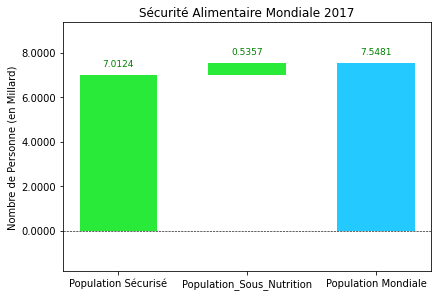

In [15]:
# Créer l'indicateur type vaterfall pour affichier les valeurs et
#la relation 'Population Mondiale', 'Population sous nutrition','Population sécurisé'

import waterfall_chart
import matplotlib.pyplot as plt
x = [round(((df_population2017['Population'].sum()-df_sous_nutrition2017['NombreDePersonne_sous_nutrition'].sum())/1000000000),4), 
     round((df_sous_nutrition2017['NombreDePersonne_sous_nutrition'].sum()/1000000000),4)]
label = ["Population Sécurisé","Population_Sous_Nutrition"]
waterfall_chart.plot(label, x, net_label='Population Mondiale',rotation_value=0,formatting='{:,.4f}')
plt.title("Sécurité Alimentaire Mondiale 2017")
plt.ylabel("Nombre de Personne (en Millard)")

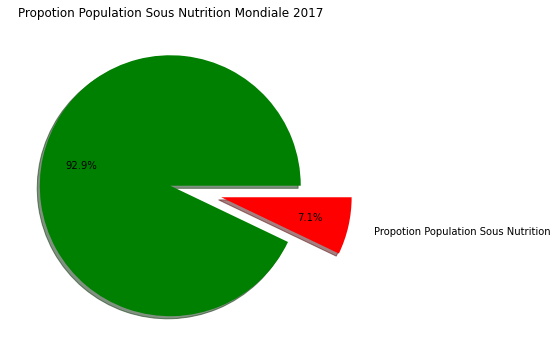

In [16]:
#Créer graphique type camembert pour affichier la proportion de population sous nutrition

x = [(1-Porportion_Sous_Nutrition_Mondial), Porportion_Sous_Nutrition_Mondial]
plt.figure(figsize=(6,6))
plt.pie(x, labels = ['', 'Propotion Population Sous Nutrition'],
           colors = ['green', 'red'],
           explode = [0, 0.4],autopct = lambda x: str(round(x, 2)) + '%',pctdistance = 0.7, labeldistance = 1.2,shadow = True)
plt.title("Propotion Population Sous Nutrition Mondiale 2017")
plt.show()

### Question2 le nombre théorique de personnes qui pourraient être nourries en 2017

#### Résultat:
Année 2017

En calorie: Disponibilité 7,732,467Mds Kcal, Nombre des personnes Nourries en théorie 8.47Mds, 

            Equivalent de 112.27% Population Mondiale

En Protéine: Disponibilité 216.76M Tonnes, Nombre des personnes Nourries en théorie 11.93Mds, 

             Equivalent de 157.99% Population Mondiale

#### Méthode:

Pour répondre cette question, il faut voir le tableau df_dispo_alimentaire en calculant Disponibilité alimentaire Mondiale en 2017. Puis il faut identifier le besoin nécessaire par personne par an recommandé par l'organisme de santé. A la fin, le nombre théorique de personnes qui pourraient être nourries en 2017 sera obtenu via la division entre Disponibilité alimentaire Mondiale en 2017 et le besoin par personne par an recommandé.

### Lire et Affichier le tableau df_dispo_alimentaire

In [17]:
df_dispo_alimentaire=pd.read_csv('C:/Users/PF/Desktop/openclassroom/P4 Réalisez une étude de santé publique avec R ou Python/dispo_alimentaire.csv')
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


### Explication de tableau df_dispo_alimentaire
1.Un fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables :
-Le pays.
-Le produit.
-4 variables de disponibilité alimentaire.

Ces 4 variables sont exprimées dans des unités bien spécifiques,qui sont précisées directement dans le nom de la variable.\ À noter cependant que la notation kcal est un abus de langage,elle correspand à une calorie réelle.\

-10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire.\ Elles sont toutes exprimées en milliers de tonnes.
-Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.


In [18]:
df_dispo_alimentaire.info()
# Avec les données montées par la méthode .info(), on trouve qu'il existe 15605 lignes de données, 
# dont il y a les données manquantes dans les disponibilité alimentaire en Kcal et en Protéine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

### Pour calculer la disponibilité alimentaire 2017, il faut ajouter la population 2017 dans le tableau df_dispo_alimentaire, donc il faut fusionner ce dernier avec le tableau df_population2017 utilisé dans la dernière question.

Vérifier la cohérence de liste des pays dans les 2 tableaux et intégrer la population 2017 dans df_dispo_alimentaire

#### Avant de fusioner les tableaux, on compare la cohérence des pays dans 2 tableaux.
Par l'analyse ci dessous, on trouve que df_dispo_alimentaire utilise le nom des pays ['Royaume-Uni', 'Tchéquie (la)'], mais ['Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Tchéquie (la)'] df_population2017, donc il faut mettre en cohérence dans df_population2017 avant de fusionner les 2 tableaux

In [19]:
ListPaysDispoAlimentaire=df_dispo_alimentaire.Zone.unique().tolist()
ListPaysPoPulation=df_population2017.Zone.unique().tolist()
print('Pays connu de df_dispo_alimentaire mais inconnu de df_population2017:\n'
      ,list(set(ListPaysDispoAlimentaire)-set(ListPaysPoPulation)))
# 2 différences concernant la nommination des pays sont identifiées

Pays connu de df_dispo_alimentaire mais inconnu de df_population2017:
 ['Tchéquie (la)', 'Royaume-Uni']


In [20]:
#Vérifier les 2 différents nomminations des pays en détail
display(df_dispo_alimentaire.Zone.unique())
display(df_population2017.Zone.unique())

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

###
Par l'analyse ci dessus, on trouve que df_dispo_alimentaire utilise le nom des pays ['Royaume-Uni', 'Tchéquie (la)'], mais ['Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Tchéquie (la)'] df_population2017, donc il faut mettre en cohérence dans df_population2017 avant de fusionner les 2 tableaux

In [21]:
#Uniformiser les nominations des pays
df_population2017['Zone'] = df_population2017['Zone'].replace(['Tchéquie',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],['Tchéquie (la)','Royaume-Uni'])
df_population2017[(df_population2017['Zone']=='Royaume-Uni') | (df_population2017['Zone']=='Tchéquie (la)')]                                                                                                                                  

C:\Users\PF\AppData\Local\Temp\ipykernel_9192\2928237623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population2017['Zone'] = df_population2017['Zone'].replace(['Tchéquie',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],['Tchéquie (la)','Royaume-Uni'])


,Zone,Année,Population
1114,Royaume-Uni,2017,66727461.0
1306,Tchéquie (la),2017,10641034.0


In [22]:
#Joindre les 2 tableau 'Population 2017' et 'Disponibilité Alimentaire'
df_dispo_alimentaire=pd.merge(df_dispo_alimentaire,df_population2017,how='left',on=['Zone'])
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0


### Calculer avec la référence Disponibilité alimentaire en Calorié


Créer tableau dispo_alimentaireKcal2017, Nettoyer les données de Disponibilité alimentaire (Kcal/personne/jour) en calculant Disponibilité alimentaire (Kcal/personne/an)

In [23]:
df_dispo_alimentaireKcal2017=pd.DataFrame(df_dispo_alimentaire,columns=['Zone','Produit','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Population'])

#défilter les valeurs aberrantes (nan ou inférieur ou égale à 0) de colonne disponibilité Kcal/personne/jour
df_dispo_alimentaireKcal2017=df_dispo_alimentaireKcal2017[df_dispo_alimentaireKcal2017['Disponibilité alimentaire (Kcal/personne/jour)']>0]

#Calculer la disponibilité Kcal par Personne Par An
df_dispo_alimentaireKcal2017['Disponibilité alimentaire (Kcal/personne/an)']=df_dispo_alimentaireKcal2017['Disponibilité alimentaire (Kcal/personne/jour)']*365
del df_dispo_alimentaireKcal2017['Disponibilité alimentaire (Kcal/personne/jour)']

#Calculer la disponibilité Kcal par produit par pays
df_dispo_alimentaireKcal2017['Disponibilité alimentaire Kcal 2017']=df_dispo_alimentaireKcal2017['Disponibilité alimentaire (Kcal/personne/an)']*df_dispo_alimentaireKcal2017['Population']
df_dispo_alimentaireKcal2017.head()

,Zone,Produit,Origine,Population,Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire Kcal 2017
0,Afghanistan,Abats Comestible,animale,36296113.0,1825.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,36296113.0,365.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,36296113.0,365.0,1.324808e+10
4,Afghanistan,Bananes,vegetale,36296113.0,1460.0,5.299232e+10
5,Afghanistan,"Beurre, Ghee",animale,36296113.0,8395.0,3.047059e+11


### Calculer Disponibilité Alimentaire Mondiale en Calorie de l'année 2017: 
##### Disponibilité Calorie Mondial en 2017 est 7,732,467 Millard.

In [24]:

DispoAlimentKcal2017Monde=df_dispo_alimentaireKcal2017['Disponibilité alimentaire Kcal 2017'].sum()
print("Disponibilité Alimentaire Mondiale en Kcal de l'année 2017:",DispoAlimentKcal2017Monde)

Disponibilité Alimentaire Mondiale en Kcal de l'année 2017: 7732466711015115.0


### Choisir les références de calcule et Calculer le besoin Calorie/personne/an et le besoin Protéine/personne/an

##### Résultat:

###### Le besoin Calorie (Kcal) par Persone Par An: 912500 Kcal
###### Le Poids Moyen Humain: 60.0
###### Le besoin Protéine par Persone Par An: 18177.0 g


##### Référence et Méthode:

On va choisir Disponibilité alimentaire en Kcal(calorie) et Disponibilité de protéines en quantité comme la référence de calcule pour répondre à la question 2 
comme Calorie et Protéines sont 2 critères principales utilisé par les organismes de santé pour la recommendation

###### On considère que le besoin énergétiques/personne/jour est 2500 Kcal
Catégories Dépenses énergétiques/jour (kcal):
Activité réduite :2200 Kcal,Activité habituelle :2500 Kcal,Activité importante : 2900 Kcal,Activité très importante : 3400 Kcal
Source:http://campus.cerimes.fr/nutrition/enseignement/nutrition_18/site/html/2.html
###### On considère que le poids humain en moyenne est (48kg + 72kg)/2
###### Le besoin protéine/personne/An recommandé = Le poids humain  x  0.83g  x 365 jours
ANSES:L'Agence considère que la référence nutritionnelle en protéines des adultes en bonne santé (RNP) est de 0,83 g/kg/j.

IMC Normal  18.5-25kgM2
Homme Poids normal  57-72KG (pour 172CM) On considère que le poids normal d'un homme est 72kg
Femme Poids normal  48-63KG (pour 160CM) On considère que le poids normal d'une femme est 63kg
Tableau IMC Source:https://fr.wikipedia.org/wiki/Indice_de_masse_corporelle

In [25]:
# Calculer le besoin Kcal par personne par an

besoinCalorieMoyenKGPersoneParAn=2500*365
print('Le besoin Calorie (Kcal) par Persone Par An:',besoinCalorieMoyenKGPersoneParAn,'Kcal')


#Calculer le besoin protéine par personne par an

PoidMoyenHumain=(48+72)/2
print('Le Poids Moyen Humain:',PoidMoyenHumain)
besoinProteinMoyenKGPersoneParAn=PoidMoyenHumain*0.83*365
print('Le besoin Protéine par Persone Par An:',besoinProteinMoyenKGPersoneParAn,'g')

Le besoin Calorie (Kcal) par Persone Par An: 912500 Kcal
Le Poids Moyen Humain: 60.0
Le besoin Protéine par Persone Par An: 18177.0 g


### Réponse de Question2 avec la disponibilité en Calorie: 
##### selon la disponibilité en Calorie: 8.47 Millards Personnes pourront être nourries avec la disponibilité alimentaire en calorié en 2017. Il est équivalent de 112.27% de population mondiale en 2017.

In [26]:
#Personnes Nourries = Disponibilité / Besoin
NombrePersonneNourriesKcal=DispoAlimentKcal2017Monde/besoinCalorieMoyenKGPersoneParAn
print("En 2017, le nombre des personnes théorique qui pourront être nourries :",NombrePersonneNourriesKcal)

#Personnes Nourries / Population 2017
print('le nombre des personnes théorique est égal à', round((NombrePersonneNourriesKcal/df_population2017['Population'].sum()*100),2),'% de Population Mondiale en 2017')

En 2017, le nombre des personnes théorique qui pourront être nourries : 8473936121.6604
le nombre des personnes théorique est égal à 112.27 % de Population Mondiale en 2017


### Calculer le nombre de personnes pourraient être nourries avec la Disponibilité alimentaire en protéine

Créer tableau dispo_alimentaireProteine2017, Nettoyer les données de Disponibilité de protéines en quantité (g/personne/jour) en calculant Disponibilité alimentaire Proteine (g/personne/an)

In [27]:
df_dispo_alimentaireProteine2017=pd.DataFrame(df_dispo_alimentaire,columns=['Zone','Produit','Origine','Disponibilité de protéines en quantité (g/personne/jour)','Population'])

#Défilter les valeurs aberrantes dans la disponibilité de protéines (valeur 'nan' ou 'inferieur ou égale à 0')
df_dispo_alimentaireProteine2017=df_dispo_alimentaireProteine2017[df_dispo_alimentaireProteine2017['Disponibilité de protéines en quantité (g/personne/jour)']>0]

#Calculer Disponibilié Protéine par personne par an
df_dispo_alimentaireProteine2017['Disponibilité alimentaire Proteine (g/personne/an)']=df_dispo_alimentaireProteine2017['Disponibilité de protéines en quantité (g/personne/jour)']*365
del df_dispo_alimentaireProteine2017['Disponibilité de protéines en quantité (g/personne/jour)']

#Calculer Disponibilité Protéine Par Produit et Par Pays
df_dispo_alimentaireProteine2017['Disponibilité alimentaire proteine 2017']=\
df_dispo_alimentaireProteine2017['Disponibilité alimentaire Proteine (g/personne/an)']*df_dispo_alimentaireKcal2017['Population']
df_dispo_alimentaireProteine2017.head()

,Zone,Produit,Origine,Population,Disponibilité alimentaire Proteine (g/personne/an),Disponibilité alimentaire proteine 2017
0,Afghanistan,Abats Comestible,animale,36296113.0,281.05,1.020102e+10
1,Afghanistan,"Agrumes, Autres",vegetale,36296113.0,7.30,2.649616e+08
2,Afghanistan,Aliments pour enfants,vegetale,36296113.0,10.95,3.974424e+08
4,Afghanistan,Bananes,vegetale,36296113.0,18.25,6.624041e+08
5,Afghanistan,"Beurre, Ghee",animale,36296113.0,10.95,3.974424e+08


### Disponibilité Alimentaire Mondiale en Proteine de l'année 2017: 
##### La disponibilité alimentaire mondiale en Protéine en 2017 est 216.76 Millons tonnes

In [28]:
DispoAlimentProteine2017Monde=df_dispo_alimentaireProteine2017['Disponibilité alimentaire proteine 2017'].sum()
print("Disponibilité Alimentaire Mondiale en Proteine de l'année 2017:",DispoAlimentProteine2017Monde)

Disponibilité Alimentaire Mondiale en Proteine de l'année 2017: 216763601228532.03


### Réponse de Question2 selon la disponibilité en Protéine: 
##### 11.93 Millards personnes pourront être nourriées. Il est équivalent de 157.99% de Population Mondiale en 2017

In [29]:
#Personnes Nourries = Disponibilité / Besoin
print("En 2017, le nombre des personnes théorique qui pourront être nourries :",DispoAlimentProteine2017Monde/besoinProteinMoyenKGPersoneParAn)

#Personnes Nourries Divise Population 2017
print("En 2017, le nombre des personnes théorique qui pourront être nourries égale à :",round((DispoAlimentProteine2017Monde/besoinProteinMoyenKGPersoneParAn/df_population2017['Population'].sum()*100),2),'% de Population Mondiale en 2017')

En 2017, le nombre des personnes théorique qui pourront être nourries : 11925158234.501404
En 2017, le nombre des personnes théorique qui pourront être nourries égale à : 157.99 % de Population Mondiale en 2017


## Question 3 le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire des produits végétaux
#### Résultat:

Produits à l'origine vegetale =6370048.25Mds Calorie et 131776.04 Mille tonnes Protéine  
En Calorié, il pourra en théorie nourrir 6.89 Mds Personnes.
En Protéine il pourra en théorie nourrir 7.25 Mds personnes.


#### Méthode:
Pour répondre à cette question, il faut effectuer l'aggregation de l'origine d'alimentaire dans les 2 tableaux df_dispo_alimentaireKcal2017 et df_dispo_alimentaireProteine2017 pour trouver la disponibilité alimentaire 2017 en Kcal et Protéines venant de Alimentaire Vegetaux

In [30]:
#Créer nouveaux tableaux avec l'agregation des disponibilité par Origine
DispoAlimentKcalParOrigine2017=pd.DataFrame(df_dispo_alimentaireKcal2017.groupby('Origine',as_index=False).agg({'Disponibilité alimentaire Kcal 2017':sum}))
DispoAlimentProteineParOrigine2017=pd.DataFrame(df_dispo_alimentaireProteine2017.groupby('Origine',as_index=False).agg({'Disponibilité alimentaire proteine 2017':sum}))
display(DispoAlimentKcalParOrigine2017)
display(DispoAlimentProteineParOrigine2017)

,Origine,Disponibilité alimentaire Kcal 2017
0,animale,1.362418e+15
1,vegetale,6.370048e+15


,Origine,Disponibilité alimentaire proteine 2017
0,animale,8.498756e+13
1,vegetale,1.317760e+14


### Réponse Question 3 : 
##### L'aliment d'origine vegetale offre plus de Calorie (6370048.25Mds Kcal) et Protéine (131776.04 Mille tonnes) en comparant à l'aliment d'origine animale. En Calorie, l'aliment vegetale pourra en théorie nourrir 6.89 Mds Personnes, contre en Protéine 7.25 Mds personnes.

In [31]:
#Créer nouvelles colonnes pour la disponibilité calorie et protéine par origine de nourriture
#Créer nouvelles colonnes pour calculer le nombre de personnes pourraient être nourries par Origine de nourriture

DispoAlimentKcalParOrigine2017['Disponibilité Kcal (Md)']=round((DispoAlimentKcalParOrigine2017['Disponibilité alimentaire Kcal 2017']/1000000000),2)
DispoAlimentProteineParOrigine2017['Disponibilité Protéine (Mille tonnes)']=round((DispoAlimentProteineParOrigine2017['Disponibilité alimentaire proteine 2017']/1000000000),2)
DispoAlimentKcalParOrigine2017['Population Nourriée (Md)']=round((DispoAlimentKcalParOrigine2017['Disponibilité alimentaire Kcal 2017']/besoinCalorieMoyenKGPersoneParAn/1000000000),2)
DispoAlimentProteineParOrigine2017['Population Nourriée (Md)']=round((DispoAlimentProteineParOrigine2017['Disponibilité alimentaire proteine 2017']/besoinProteinMoyenKGPersoneParAn/1000000000),2)
display(DispoAlimentKcalParOrigine2017)
display(DispoAlimentProteineParOrigine2017)

,Origine,Disponibilité alimentaire Kcal 2017,Disponibilité Kcal (Md),Population Nourriée (Md)
0,animale,1.362418e+15,1362418.46,1.49
1,vegetale,6.370048e+15,6370048.25,6.98


,Origine,Disponibilité alimentaire proteine 2017,Disponibilité Protéine (Mille tonnes),Population Nourriée (Md)
0,animale,8.498756e+13,84987.56,4.68
1,vegetale,1.317760e+14,131776.04,7.25


Text(0, 0.5, 'Population (Md)')

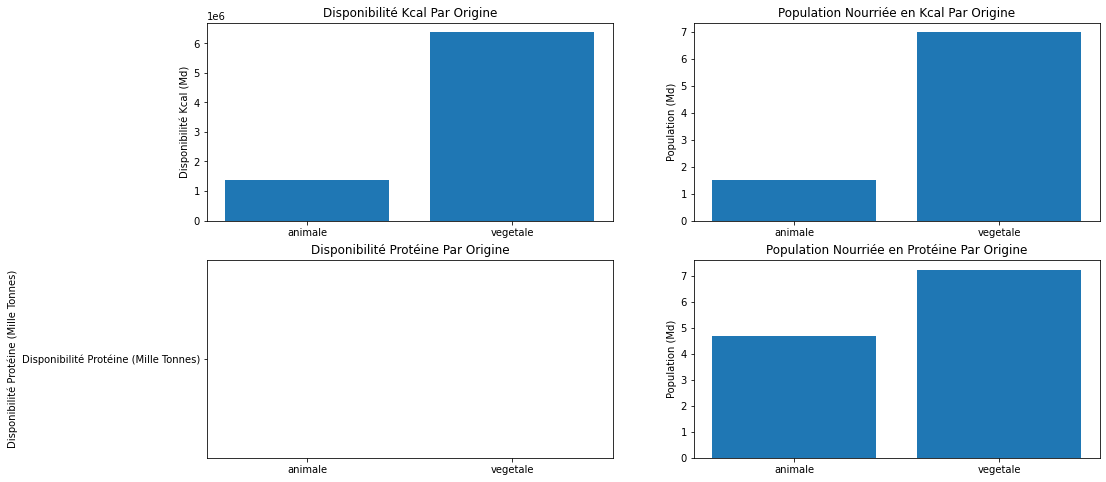

In [32]:
#Créer les graphiques pour visualiser la disponibilité, le nombre de personnes Pourraient être nourries par Origine

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.bar('Origine','Disponibilité Kcal (Md)',data=DispoAlimentKcalParOrigine2017)
plt.title("Disponibilité Kcal Par Origine")
plt.ylabel("Disponibilité Kcal (Md)")

plt.subplot(2,2,2)
plt.bar('Origine','Population Nourriée (Md)',data=DispoAlimentKcalParOrigine2017)
plt.title("Population Nourriée en Kcal Par Origine")
plt.ylabel("Population (Md)")

plt.subplot(2,2,3)
plt.bar('Origine','Disponibilité Protéine (Mille Tonnes)',data=DispoAlimentProteineParOrigine2017)
plt.title("Disponibilité Protéine Par Origine")
plt.ylabel("Disponibilité Protéine (Mille Tonnes)")

plt.subplot(2,2,4)
plt.bar('Origine','Population Nourriée (Md)',data=DispoAlimentProteineParOrigine2017)
plt.title("Population Nourriée en Protéine Par Origine")
plt.ylabel("Population (Md)")


### Question 4 l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

#### Résultat:

Propotion Nourriture dans la disponibilité intérieur: 49.48 %

Propotion Pertes dans la disponibilité intérieur: 4.6 %

Propotion Aliments Pour Animaux dans la disponibilité intérieur: 13.23 %

Propotion Autres Utilisations dans la disponibilité intérieur: 8.78 %

Propotion Semences dans la disponibilité intérieur: 1.57 %

Propotion Traitement dans la disponibilité intérieur: 22.37 %

#### Méthode:

#### Relation identifié entre les variables
DisponibilitéIntérieur=Production+Importation+Variation de stock-Exportation
DisponibilitéInterieur=Nourriture+Pertes+Semences+Traitement+Aliments pour animaux+Autres Utilisations

#### Sur la base de tableau df_dispo_alimentaire, créer le tableau Disponibilité qui inclut seulement les colonnes essentielles pour calculer la proportion de la disponibilité intérieur

##### Analyser les données avant de créer le tableau

In [33]:
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 15604
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [34]:
Disponibilite=pd.DataFrame(df_dispo_alimentaire,columns=['Zone', 'Produit', 'Origine', 'Aliments pour animaux','Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité','Importations - Quantité', 'Nourriture', 'Pertes', 'Production','Semences', 'Traitement', 'Variation de stock'])
Disponibilite.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [35]:
#Vérifier le nombre des valeurs 'Nan' dans 'Disponibilité intérieur'
display(Disponibilite[Disponibilite['Disponibilité intérieure'].isna()].count())
print('****************************************************************')
#Vérifier le nombre des valeurs '0' ou négative dans 'Disponibilité intérieur'
display(Disponibilite[Disponibilite['Disponibilité intérieure']<=0].count())

Zone                        223
Produit                     223
Origine                     223
Aliments pour animaux         0
Autres Utilisations           0
Disponibilité intérieure      0
Exportations - Quantité       0
Importations - Quantité       0
Nourriture                    0
Pertes                        0
Production                    0
Semences                      0
Traitement                    0
Variation de stock            0
dtype: int64

****************************************************************


Zone                        4208
Produit                     4208
Origine                     4208
Aliments pour animaux        437
Autres Utilisations         1356
Disponibilité intérieure    4208
Exportations - Quantité     2221
Importations - Quantité     4052
Nourriture                  3574
Pertes                       153
Production                   891
Semences                      86
Traitement                   106
Variation de stock           929
dtype: int64

#### Selon l'analyse ci dessus de colonne Disponibilité intérieure, il y a 4208 valeurs inférieur à ou égale à 0, et 223 valeurs is Nan,il faut défilter ces lignes avant de calculer la proportion

In [36]:
#Enlever les valeurs Nan, 0, Négative dans la colonne 'Disponibilité intérieur'
Disponibilite=Disponibilite[Disponibilite['Disponibilité intérieure']>0]

In [37]:
#Calculer la propartion de chaque composant dans la disponibilité intérieur étant donnée que :
#DisponibilitéInterieur=Nourriture+Pertes+Semences+Traitement+Aliments pour animaux+Autres Utilisations

PropotionNourriture=Disponibilite['Nourriture'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Nourriture dans la disponibilité intérieur:',round(PropotionNourriture*100,2),'%')

PropotionPertes=Disponibilite['Pertes'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Pertes dans la disponibilité intérieur:',round(PropotionPertes*100,2),'%')

PropotionAlimentsPourAnimaux=Disponibilite['Aliments pour animaux'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Aliments Pour Animaux dans la disponibilité intérieur:',round(PropotionAlimentsPourAnimaux*100,2),'%')

PropotionAutresUtilisations=Disponibilite['Autres Utilisations'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Autres Utilisations dans la disponibilité intérieur:',round(PropotionAutresUtilisations*100,2),'%')

PropotionSemences=Disponibilite['Semences'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Semences dans la disponibilité intérieur:',round(PropotionSemences*100,2),'%')

PropotionTraitement=Disponibilite['Traitement'].sum()/Disponibilite['Disponibilité intérieure'].sum()
print('Propotion Traitement dans la disponibilité intérieur:',round(PropotionTraitement*100,2),'%')


Propotion Nourriture dans la disponibilité intérieur: 49.48 %
Propotion Pertes dans la disponibilité intérieur: 4.6 %
Propotion Aliments Pour Animaux dans la disponibilité intérieur: 13.23 %
Propotion Autres Utilisations dans la disponibilité intérieur: 8.78 %
Propotion Semences dans la disponibilité intérieur: 1.57 %
Propotion Traitement dans la disponibilité intérieur: 22.37 %


Text(17.25, 0.5, 'Pourcentage')

<Figure size 1152x576 with 0 Axes>

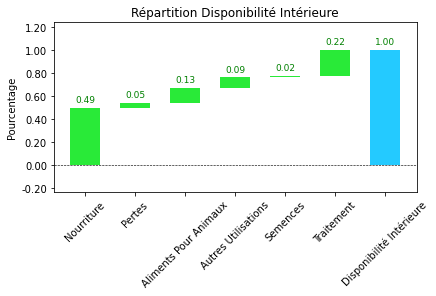

In [38]:
#Graphieque type Water Fall pour visualiser le proportion de chaque variable dans la disponibilité intérieur

plt.figure(figsize=(16,8)) 
x = [0.4948, 0.046, 0.1323, 0.0878, 0.0157, 0.2237] 
label = ["Nourriture","Pertes","Aliments Pour Animaux","Autres Utilisations","Semences","Traitement"]
waterfall_chart.plot(label, x, net_label='Disponibilité Intérieure',rotation_value=45,formatting='{:,.2f}')
plt.title("Répartition Disponibilité Intérieure")
plt.ylabel("Pourcentage")

## Question 5 les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

#### Résultat

##### Selon la population dans le pays:

1 : Top5 pays le taux de sous nutrition dans le pays le plus elevé sont : Haïti,République populaire démocratique de Corée,Madagascar,Libéria,Lesotho

2 : Les 19 pays suivants ont tous une taux de sous nutrition supérieur à 20%: 'Afghanistan', 'Botswana', 'Congo', "Côte d'Ivoire", 'Haïti', 'Iraq', 'Kenya', 'Lesotho', 'Libéria', 'Madagascar', 'Mozambique', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sierra Leone', 'Tchad', 'Timor-Leste', 'Togo', 'Venezuela (République bolivarienne du)'
Ils sont dans les zones comme Afrique, Moyen-Oriean, L'amérique du sud, Asie

3 : 42 pays dans les 263 pays (sois 16% des pays) avec un taux de sous nutrition > 10%

##### Selon la population sous nutrition mondiale:

1. Inde a 35% de personne sous nutrition mondiale en valeur absolue.

2. 52% des personnes sous nutrition mondiale (soit 282800000 personnes) sont dans les pays Top5 Inde,Pakistan,Indonésie,Nigéria,Bangladesh

3. 30 pays dans les 263 pays a 90% de population sous nutrition. 

4. La densité de pourcentage de sous nutrition mondiale sont concentré entre 0 et 4%. 

#### Méthode


La question demande une fusion en ajoutant df_sous_nutrition2017 dans df_population2017
Avant de fusionner les 2 tableaux, il faut contrôler si tous les pays df_sous_nutrition2017 sont connu de df_population2017


In [39]:
#Vérifier la cohérence de liste des pays entre les 2 tableaux
ListPaysSousNutrition=df_sous_nutrition2017.Zone.unique().tolist()
ListPaysPopulation=df_population2017.Zone.unique().tolist()
print('Pays connu de df_sous_nutrition2017 mais inconnu de df_population2017:',list(set(ListPaysSousNutrition)-set(ListPaysPopulation)))

Pays connu de df_sous_nutrition2017 mais inconnu de df_population2017: ['Tchéquie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [40]:
#Modifier les différences dans tableau sous nutrition avant de joindre le tableau population
df_sous_nutrition2017['Zone'] = df_sous_nutrition2017 ['Zone'].replace(['Tchéquie',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],['Tchéquie (la)','Royaume-Uni'])
df_sous_nutrition2017[(df_sous_nutrition2017 ['Zone']=='Royaume-Uni') | (df_sous_nutrition2017 ['Zone']=='Tchéquie (la)')]

C:\Users\PF\AppData\Local\Temp\ipykernel_9192\395487531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_nutrition2017['Zone'] = df_sous_nutrition2017 ['Zone'].replace(['Tchéquie',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],['Tchéquie (la)','Royaume-Uni'])


,Zone,AnnéeCorrigé,NombreDePersonne_sous_nutrition
964,Royaume-Uni,2017,0
1108,Tchéquie (la),2017,0


In [41]:
#Créer le nouveau tableau PopulationEtSousNutrition en fusionner le tableau de population et sous nutrition
PopulationEtSousNutrition=pd.merge(df_population2017,df_sous_nutrition2017,how='left',on=['Zone'])
del PopulationEtSousNutrition['AnnéeCorrigé']
PopulationEtSousNutrition.head()

,Zone,Année,Population,NombreDePersonne_sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [42]:
#vérifier les valeurs Nan dans le tableau, On trouve 33 valeurs manquantes dans NombreDePersonne_sous_nutrition  (263-203)
PopulationEtSousNutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zone                             236 non-null    object 
 1   Année                            236 non-null    int64  
 2   Population                       236 non-null    float64
 3   NombreDePersonne_sous_nutrition  203 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.2+ KB


In [43]:
# remplacer les valeurs Nan par 0
PopulationEtSousNutrition=PopulationEtSousNutrition.fillna(0)

### Réponse 1 de Question 5 les pays  la proportion de personnes sous-alimentées dans le pays la plus forte en 2017


1 : Les top5 pays le taux de sous nutrition dans le pays le plus elevé sont : Haïti,République populaire démocratique de Corée,Madagascar,Libéria,Lesotho

2 : Les 19 pays suivants ont tous une taux de sous nutrition supérieur à 20%:
'Afghanistan', 'Botswana', 'Congo', "Côte d'Ivoire", 'Haïti', 'Iraq', 'Kenya', 'Lesotho', 'Libéria', 'Madagascar', 'Mozambique', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sierra Leone', 'Tchad', 'Timor-Leste', 'Togo', 'Venezuela (République bolivarienne du)'

3 : 42 pays dans 263 pays ont un taux sous nutrition > 10% (situation critique)

In [44]:

# Créer colonne '%SousNutritionParPays' en calculant le taux sous nutrition par pays
PopulationEtSousNutrition['%SousNutritionParPays']=round((PopulationEtSousNutrition.NombreDePersonne_sous_nutrition/PopulationEtSousNutrition.Population)*100,2)

#Ranger les données en ordre décroissant de colonne '%SousNutritionParPays' et affichier les Top5

print('Les top 5 pays en propotion de sous nutrition dans le pays')
PopulationEtSousNutrition1=PopulationEtSousNutrition.sort_values(by='%SousNutritionParPays',ascending=False)
display(PopulationEtSousNutrition1.head())

#Créer tableau 'Top5Pays_SousNutritionDansLePays' pour la graphique
Top5Pays_SousNutritionDansLePays=PopulationEtSousNutrition1.head(5)


Les top 5 pays en propotion de sous nutrition dans le pays


,Zone,Année,Population,NombreDePersonne_sous_nutrition,%SousNutritionParPays
87,Haïti,2017,10982366.0,5300000.0,48.26
181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
128,Madagascar,2017,25570512.0,10500000.0,41.06
122,Libéria,2017,4702226.0,1800000.0,38.28
119,Lesotho,2017,2091534.0,800000.0,38.25


Text(0.5, 1.0, 'Top5 Sous Nutrition Dans le Pays')

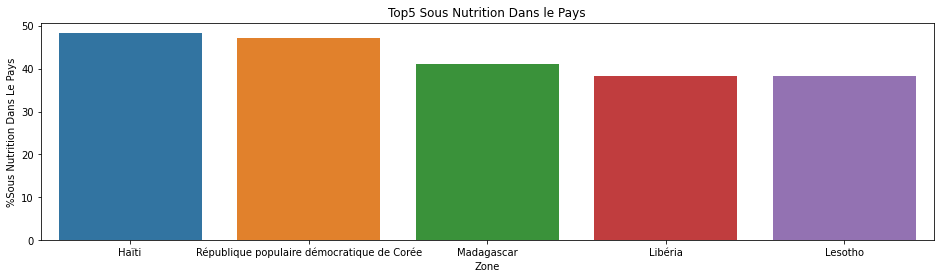

In [45]:
#Créer Graphique de Top5
plt.figure(figsize=(16,4))
sns.barplot(x="Zone",y="%SousNutritionParPays", data=Top5Pays_SousNutritionDansLePays)
plt.ylabel('%Sous Nutrition Dans Le Pays')
plt.title('Top5 Sous Nutrition Dans le Pays')

Text(0.5, 1.0, 'Distribution Taux Sous Nutrition Dans le Pays')

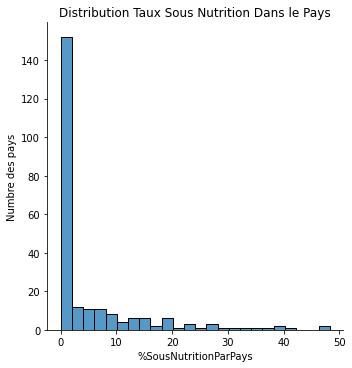

In [46]:
#Créer Graphique pour visualiser la distribution de nombre des pays en fonction de %SousNutritionParPays

sns.displot(PopulationEtSousNutrition, x="%SousNutritionParPays")
plt.ylabel('Numbre des pays')
plt.title('Distribution Taux Sous Nutrition Dans le Pays')

In [47]:
#Affichier le nombre de pays qui ont un taux de sous nutrition >10% ET 20%, et lister les pays > 20%
print("le nombre des pays d'où la proportion de sous nutrition dans le pays >10%:",PopulationEtSousNutrition[PopulationEtSousNutrition["%SousNutritionParPays"]>10].Zone.count())
print("le nombre des pays d'où la proportion de sous nutrition dans le pays >20%:",PopulationEtSousNutrition[PopulationEtSousNutrition["%SousNutritionParPays"]>20].Zone.count())
print("liste des pays d'où la proportion de sous nutrition dans le pays >20%:",PopulationEtSousNutrition[PopulationEtSousNutrition["%SousNutritionParPays"]>20].Zone.to_list())

le nombre des pays d'où la proportion de sous nutrition dans le pays >10%: 42
le nombre des pays d'où la proportion de sous nutrition dans le pays >20%: 19
liste des pays d'où la proportion de sous nutrition dans le pays >20%: ['Afghanistan', 'Botswana', 'Congo', "Côte d'Ivoire", 'Haïti', 'Iraq', 'Kenya', 'Lesotho', 'Libéria', 'Madagascar', 'Mozambique', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sierra Leone', 'Tchad', 'Timor-Leste', 'Togo', 'Venezuela (République bolivarienne du)']


### Réponse 2 de Question 5:

1. Inde ne sont pas connu de top5 pays d'où la proportion sous nutrition dans le pays est le plus fort. Mais 35% de personne sous nutrition en 2017 est en Inde. Au niveau de la valeur absolue de la population sous nutrition, l'Inde est classé en premier.

2. 52% de personne sous nutrition (soit 282800000 personnes) sont dans 5 pays Inde,Pakistan,Indonésie,Nigéria,Bangladesh

3. La densité indique les pays sont concentré avec un taux de sous nutrition mondiale entre 0% à 4%

4. 30 pays dans les 263 pays (soit 11% des pays) a 90% de population sous nutrition. (Zones concernés: Afrique/Moyen-Oriean/Asie)

'Inde', 'Pakistan', 'Indonésie', 'Nigéria', 'Bangladesh', 'Éthiopie', 'Philippines', 'République-Unie de Tanzanie', 'République populaire démocratique de Corée', 'Kenya', 'Afghanistan', 'Madagascar', 'Mozambique', 'Iraq', 'Mexique', 'Venezuela (République bolivarienne du)', 'Myanmar', 'Viet Nam', 'Thaïlande', 'Angola', 'Tchad', 'Haïti', 'Soudan', "Côte d'Ivoire", 'Égypte', 'Rwanda', "Iran (République islamique d')", 'Burkina Faso', 'Malawi', 'Afrique du Sud'


In [48]:
#Créer colonne %SousNutritionMonde (Personne sous nutrition de chaque pays / total de personne sous nutrition), 
#et le classer en ordre décroissant


PopulationEtSousNutrition['%SousNutritionMonde']=round((PopulationEtSousNutrition.NombreDePersonne_sous_nutrition/PopulationEtSousNutrition.NombreDePersonne_sous_nutrition.sum())*100,2)
PopulationEtSousNutrition2=PopulationEtSousNutrition.sort_values(by='%SousNutritionMonde', ascending=False)

#seléctionner les Top5 en créant un nouveau tableau Top5SousNutritionMonde pour les affichier et faire le graphique

Top5SousNutritionMonde=PopulationEtSousNutrition2.head(5)
Top5SousNutritionMonde

,Zone,Année,Population,NombreDePersonne_sous_nutrition,%SousNutritionParPays,%SousNutritionMonde
103,Inde,2017,1.338677e+09,190100000.0,14.20,35.49
160,Pakistan,2017,2.079062e+08,24800000.0,11.93,4.63
104,Indonésie,2017,2.646510e+08,23600000.0,8.92,4.41
152,Nigéria,2017,1.908732e+08,22800000.0,11.95,4.26
19,Bangladesh,2017,1.596854e+08,21500000.0,13.46,4.01


In [49]:
# Créer colonne taux sous nutrition mondiale cumulative '%CummulSousAlimentMonde'

PopulationEtSousNutrition2['%CummulSousAlimentMonde']=PopulationEtSousNutrition2['%SousNutritionMonde'].cumsum()

#sélectionner les pays d'où 90% des personnes sous nutrition dans le monde se situe
#Affichier le nombre des pays concerné et leur noms

PopulationEtSousNutrition3=PopulationEtSousNutrition2[PopulationEtSousNutrition2['%CummulSousAlimentMonde']<90]
print("Nombre de pays d'où on trouve 90% de personne sous nutrition:",PopulationEtSousNutrition3.Zone.count())
print("liste des pays d'où on trouve 90% de personne sous nutrition:",PopulationEtSousNutrition3.Zone.to_list())

Nombre de pays d'où on trouve 90% de personne sous nutrition: 30
liste des pays d'où on trouve 90% de personne sous nutrition: ['Inde', 'Pakistan', 'Indonésie', 'Nigéria', 'Bangladesh', 'Éthiopie', 'Philippines', 'République-Unie de Tanzanie', 'République populaire démocratique de Corée', 'Kenya', 'Afghanistan', 'Madagascar', 'Mozambique', 'Iraq', 'Mexique', 'Venezuela (République bolivarienne du)', 'Myanmar', 'Viet Nam', 'Thaïlande', 'Angola', 'Tchad', 'Haïti', 'Soudan', "Côte d'Ivoire", 'Égypte', 'Rwanda', "Iran (République islamique d')", 'Burkina Faso', 'Malawi', 'Afrique du Sud']


Text(0.5, 1.0, 'Distribution Propotion Sous Nutrition Mondiale')

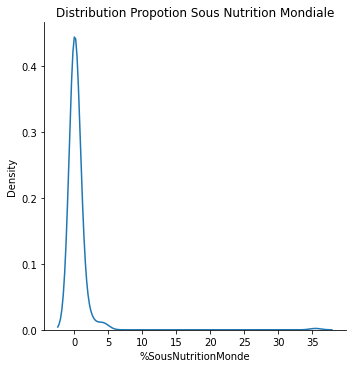

In [50]:
#Créer le graphique de distribution de nombre des pays selon le taux de sous nutrition mondiale
sns.displot(PopulationEtSousNutrition2, x="%SousNutritionMonde",kind='kde')
plt.title('Distribution Propotion Sous Nutrition Mondiale')


In [51]:
#Voir les pays qui ont un taux sous nutrition mondiale > 4%, il s'agit bien les pays Top5

print('Liste des pays avec un taux sous nutrition mondiale >4%:',PopulationEtSousNutrition2[PopulationEtSousNutrition2['%SousNutritionMonde']>4].Zone.to_list())
print('Nombre de personne sous nutrition dans les pays qui ont un taux sous nutrition mondiale >4%:',PopulationEtSousNutrition2[PopulationEtSousNutrition2['%SousNutritionMonde']>4].NombreDePersonne_sous_nutrition.sum(),'personnes')

Liste des pays avec un taux sous nutrition mondiale >4%: ['Inde', 'Pakistan', 'Indonésie', 'Nigéria', 'Bangladesh']
Nombre de personne sous nutrition dans les pays qui ont un taux sous nutrition mondiale >4%: 282800000.0 personnes


Text(0.5, 1.0, 'Top5 Proportion Sous Nutrition Mondiale')

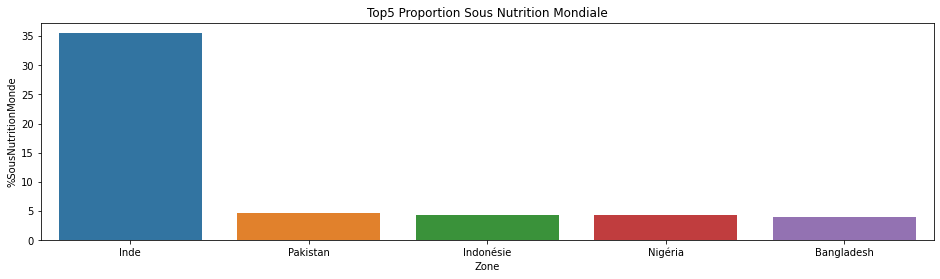

In [52]:
#Créer Graphique Top5 selon le taux sous Nutrition mondiale

plt.figure(figsize=(16,4))
sns.barplot(x="Zone",y="%SousNutritionMonde", data=Top5SousNutritionMonde)
plt.ylabel('%SousNutritionMonde')
plt.title('Top5 Proportion Sous Nutrition Mondiale')

## Question 6 les pays qui ont le plus bénéficié d’aide depuis 2013

#### Résultat:
##### Top5 Pays beneficient le plus d'aides depuis 2013
1. République arabe syrienne 1858943 Tonnes
2. Éthiopie 1381294 Tonnes
3. Yémen 1206484 Tonnes
4. Soudan du Sud 695248 Tonnes
5. Soudan 669784 Tonnes

##### Top5 produits le plus utilisé:
1. Céréales 4256884
2. Blé et Farin 1781515
3. Non-céréales 1261513
4. Céréales Secondaires 1166565
5. Riz, total 742418

#### Méthode:
Dans df_aide_alimentaire, on regrouper les aides en tonnes par Pays puis classer la colonne Valeur en ordre décroissant 
Idem  pour le classement des produits le plus utilisé

In [53]:
df_aide_alimentaire=pd.read_csv('C:/Users/PF/Desktop/openclassroom/P4 Réalisez une étude de santé publique avec R ou Python/aide_alimentaire.csv')

df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


### Explication de fichier df_aide_alimentaire

Un fichier d’aide alimentaire qui contient :
-Le pays bénéficiaire.
-L’année.
-Le produit.
-La quantité qui a été donnée comme aide alimentaire, en tonnes.


In [54]:
#Il n'y a pas de valeurs manquantes à traiter
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [55]:
#Vérifier les valeurs de colonne Année pour préparer l'agrégation
df_aide_alimentaire.Année.unique()

array([2013, 2014, 2015, 2016], dtype=int64)

### Réponse Question 6: 
76 Pays ont obtenu l'aide depuis 2013

Les top 5 pays qui a eu le plus des aides alimentaires depuis 2013 : 'République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud','Soudan'

In [56]:
df_aideAlimentParPays=df_aide_alimentaire.groupby('Pays bénéficiaire',as_index=False).agg({'Valeur':sum})
df_aideAlimentParPays1=df_aideAlimentParPays.sort_values(by='Valeur', ascending=False).rename(columns=({'Valeur':'Aide(tonnes)'}))
print("Le nombre des pays qui ont obtenu l'aide depuis 2013:",df_aideAlimentParPays1['Pays bénéficiaire'].count(),'pays')
print('Les top 5 pays qui a eu le plus des aides alimentaires depuis 2013')
Top5PaysLePlusDesAide=df_aideAlimentParPays1.head(5)
Top5PaysLePlusDesAide

Le nombre des pays qui ont obtenu l'aide depuis 2013: 76 pays
Les top 5 pays qui a eu le plus des aides alimentaires depuis 2013


,Pays bénéficiaire,Aide(tonnes)
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784


<AxesSubplot:xlabel='Pays bénéficiaire', ylabel='Aide(tonnes)'>

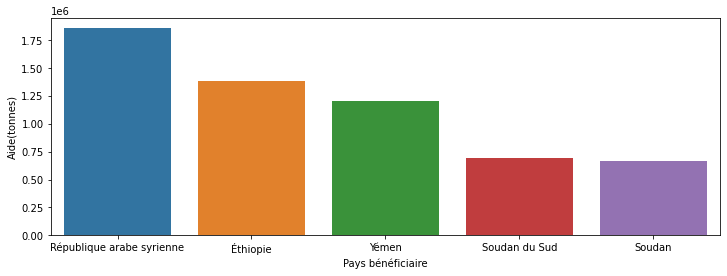

In [57]:
#Créer le graphique Top5 pays qui ont le plus d'aides depuis 2013
plt.figure(figsize=(12, 4))
sns.barplot(x='Pays bénéficiaire', y='Aide(tonnes)', data=Top5PaysLePlusDesAide)

Text(0.5, 1.0, 'Classement des Pays qui ont obtenus les aides depuis 2013')

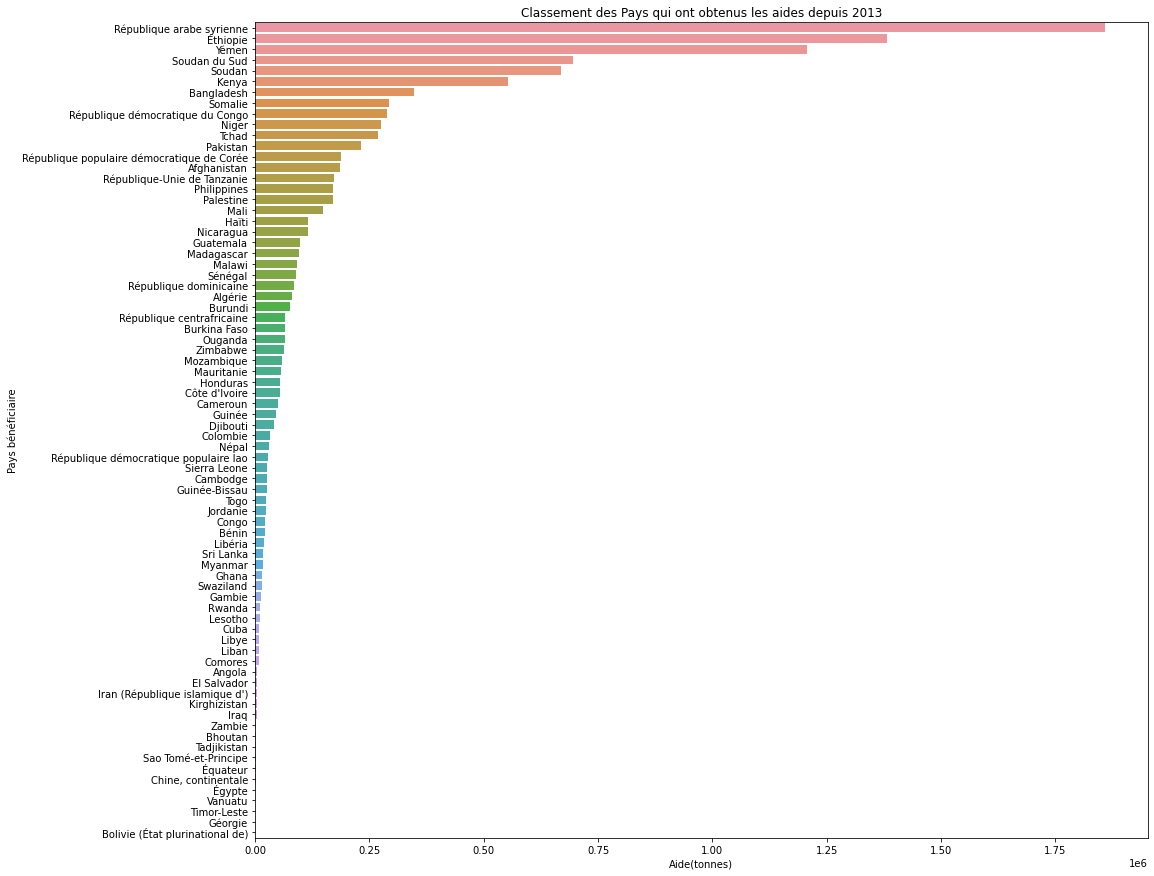

In [58]:
#Créer le graphique pour affichier l'aide obtenu par pays en ordre décroissant
plt.figure(figsize=(16, 15))
sns.barplot(x='Aide(tonnes)', y='Pays bénéficiaire', data=df_aideAlimentParPays1)
plt.title('Classement des Pays qui ont obtenus les aides depuis 2013')

In [59]:
AideParProduit=df_aide_alimentaire.groupby(['Produit'],as_index=False).agg({'Valeur':sum}).sort_values(by=['Valeur'],ascending=False)
AideParProduit=AideParProduit.rename(columns=({'Valeur':'Aide(tonnes)'}))
print('Les 5 produits le plus utilisés:',AideParProduit.head(5)['Produit'].unique())
AideParProduit.head()

Les 5 produits le plus utilisés: ['Céréales' 'Blé et Farin' 'Non-céréales' 'Céréales Secondaires'
 'Riz, total']


,Produit,Aide(tonnes)
3,Céréales,4256884
1,Blé et Farin,1781515
11,Non-céréales,1261513
4,Céréales Secondaires,1166565
13,"Riz, total",742418


<AxesSubplot:xlabel='Produit', ylabel='Aide(tonnes)'>

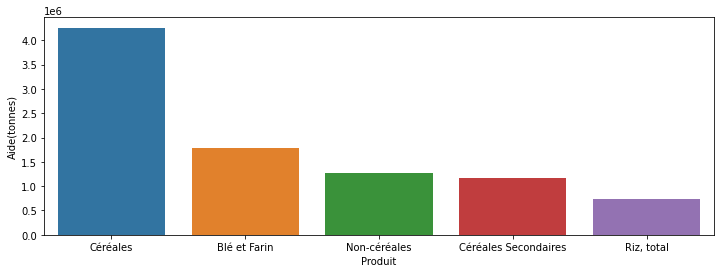

In [60]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Produit', y='Aide(tonnes)', data=AideParProduit.head(5))

Text(0.5, 1.0, 'Classement des Aliments Utilisés dans les Aides aux Pays Sous Nutrition')

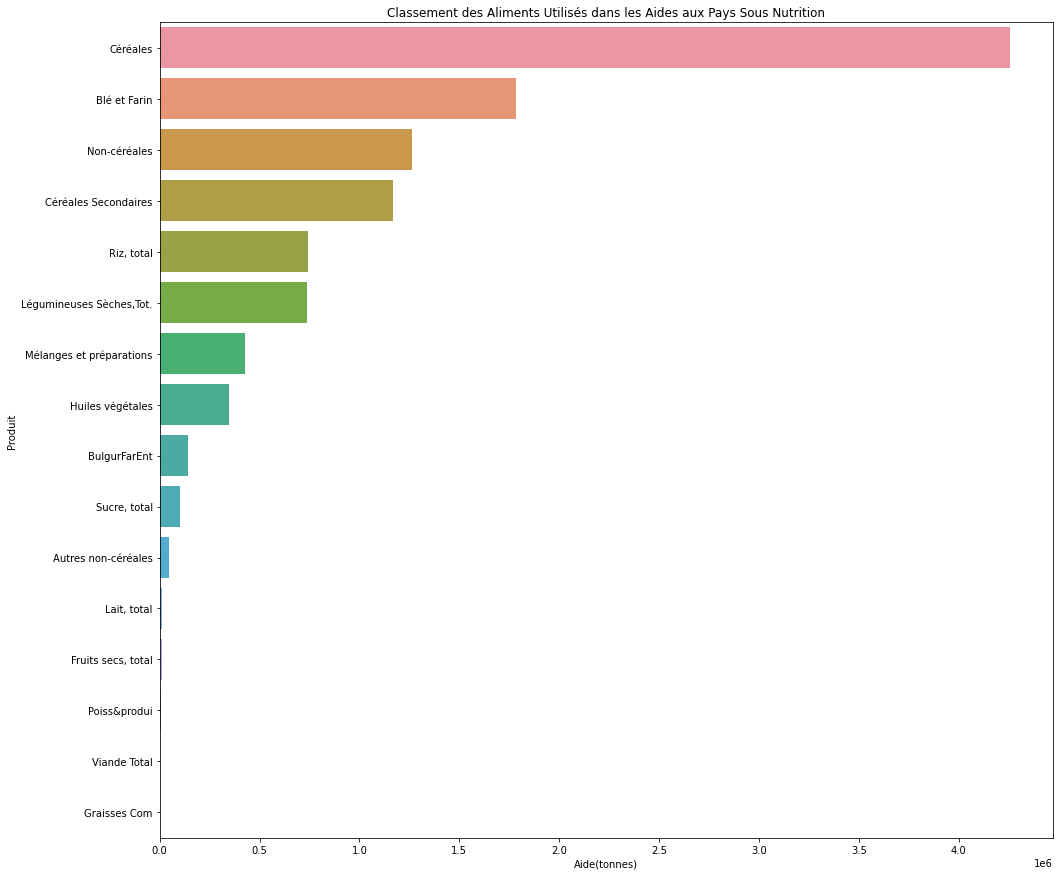

In [61]:
#Créer le graphique pour affichier l'aide par produit en ordre décroissant
plt.figure(figsize=(16, 15))
sns.barplot(x='Aide(tonnes)', y='Produit', data=AideParProduit)
plt.title('Classement des Aliments Utilisés dans les Aides aux Pays Sous Nutrition')


### Question 7 les pays qui ont le plus et le moins disponibilité par Calorié par Habitant

#### Résultat: 

##### En Calorie

-Les 5 pays ont le plus de disponibilité/habitant: Autriche,Belgique,Turquie,États-Unis d'Amérique, Israël , disponibilité 3600K-3800Kcal/Pers/J

-Les 5 pays ont le moins de la disponibilité/habitant:Haïti,Afghanistan,Madagascar,Zambie,République centrafricaine, disponibilité 1800K-2100Kcal/Pers/J

##### La distribution des pays selon la disposition Kcal/habitant:

-La distribution indique une déséquilibre entre les pays concernant la disponibilité Kcal/habitant. Il y a plus des pays qui ont une disponibilité entre 2700-3500kcal/personne/j, mais en même temps il y a les pays qui atteint pas à la seuil recommandée 2500Kcal/habitant/jour

-13 pays qui ont une disponibilité Calorié par Habitant < 2000Kcal/J

-10 pays qui ont une disponibilité Calorié par Habitant > 3500Kcal/J

##### En Protéine
-Les 5 pays ont le plus de disponibilité/habitant: 'Islande', 'Chine - RAS de Hong-Kong', 'Israël', 'Lituanie',
       'Maldives' disponibilité: 122-133g/pers/j

-Les 5 pays ont le moins de la disponibilité/habitant: 'Madagascar', 'République centrafricaine', 'Mozambique',
       'Guinée-Bissau', 'Libéria', disponibilité : 37-46g/pers/j

##### En Matière Grasse
-Les 5 pays ont le plus de disponibilité/habitant: Autriche', 'Belgique', "États-Unis d'Amérique", 'France',
       'Italie'  disponibilité (154-170g/pers/j)

-Les 5 pays ont le moins de la disponibilité/habitant:Lesotho', 'Bangladesh', 'Éthiopie', 'Madagascar', 'Rwanda' disponibilité (23-32g/pers/j)


##### En Quantité
-Les 5 pays ont le plus de disponibilité/habitant: 'Monténégro', 'Luxembourg', 'Irlande', 'Albanie', 'Finlande' disponibilité: 1000-1300kg/pers/j

-Les 5 pays ont le moins de la disponibilité/habitant: 'Éthiopie', 'Afghanistan', 'Zambie', 'Zimbabwe', 'Tchad' disponibilité: 310-360kg/pers/j


#### Méthode:

A partir de tableau dispo_alimentaire, on sélectionne 4 type de disponibilité par habitant en les agrègeant par pays.
On va créer le tableau de classement par type de disponibilité en ordre décroissant pour identifier les 5 pays ont plus de la disponibilité et les 5 pays ont le moins de la disponibilité par type des 4 disponibilité par habitant.


In [62]:
#Créer le tableau Disponibilité Par Habitant en sélectionnant 4 disponibilité/habitant et faisant l'agrégation par Pays
DisponibilitéParHabitant=df_dispo_alimentaire.groupby(['Zone'],as_index=False).agg({'Disponibilité alimentaire (Kcal/personne/jour)':sum,'Disponibilité alimentaire en quantité (kg/personne/an)':sum,'Disponibilité de matière grasse en quantité (g/personne/jour)':sum,'Disponibilité de protéines en quantité (g/personne/jour)':sum})
DisponibilitéParHabitant.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,2087.0,351.41,33.50,58.26
1,Afrique du Sud,3020.0,564.80,83.58,85.33
2,Albanie,3188.0,1095.54,106.48,111.37
3,Algérie,3293.0,809.13,76.48,91.92
4,Allemagne,3503.0,957.52,141.62,101.39


### Réponse 1 Question 7 le top5 des pays qui sont le plus et le moins de disponibilité par habitant en Calorie

In [63]:
#Créer tableau Classement Par Calorie en ranger les disponibilité alimentaire Kcal en ordre décroissant
ClassementParCalorié=DisponibilitéParHabitant.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
ClassementParCalorié=ClassementParCalorié[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
#Sélectionner les top5 (le plus de disponibillité/habitant) et le tail5(le moins de disponibilité/habitant en Kcal)
print('les top 5 pays ont le plus de disponibilité Kcal par habitant')
display(ClassementParCalorié.head())
print('les top 5 pays ont le moins de disponibilité Kcal par habitant')
display(ClassementParCalorié.tail())

#Créer Top5Calorie et Tail5Calorie pour le graphique
Top5Calorie=ClassementParCalorié.head(5)
Tail5Calorie=ClassementParCalorié.tail(5)

les top 5 pays ont le plus de disponibilité Kcal par habitant


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0


les top 5 pays ont le moins de disponibilité Kcal par habitant


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
65,Haïti,2089.0
0,Afghanistan,2087.0
91,Madagascar,2056.0
166,Zambie,1924.0
128,République centrafricaine,1879.0


Text(0.5, 1.0, '5 pays le moins de disponibilité/habitant en calorié')

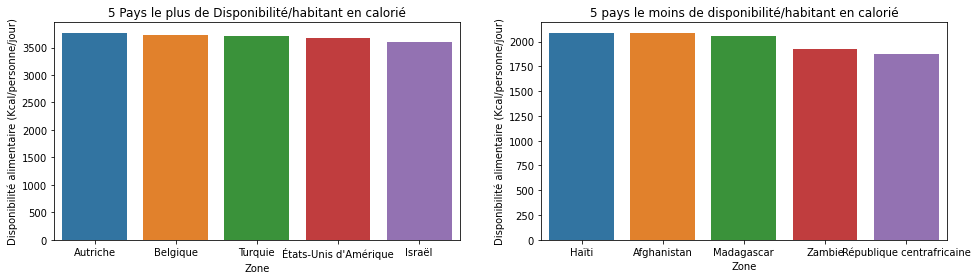

In [64]:
#Créer le graphique pour visualiser les 5 pays le plus de disponibilité et les 5 pays le moins de disponibilité Kcal

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x="Zone",y="Disponibilité alimentaire (Kcal/personne/jour)", data=Top5Calorie)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('5 Pays le plus de Disponibilité/habitant en calorié')

plt.subplot(1,2,2)
sns.barplot(x="Zone",y="Disponibilité alimentaire (Kcal/personne/jour)", data=Tail5Calorie)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('5 pays le moins de disponibilité/habitant en calorié')


### Réponse 2 Question 7  Distribution de Nombre des pays en fonction de Disponibilité alimentaire (Kcal/personne/jour)
##### une déséquilibre de la disponibilité entre les pays indiqué par le deuxième Pic de cloche (entre 2700 et 3500Kcal/pers/j)
##### 13 pays qui ont une disponibilité Calorié par Habitant < 2000Kcal/J 
##### 10 pays qui ont une disponibilité Calorié par Habitant > 3500Kcal/J

Text(0.5, 1.0, 'Distribution Pays Disponibilité Calorié/Habitant')

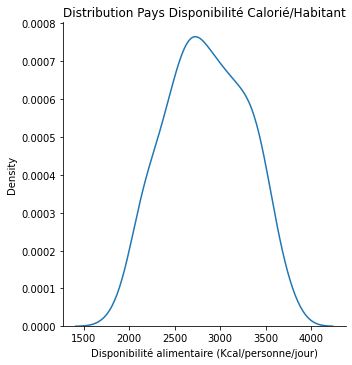

In [65]:
sns.displot(ClassementParCalorié, x="Disponibilité alimentaire (Kcal/personne/jour)", kind="kde")
plt.title('Distribution Pays Disponibilité Calorié/Habitant')

In [66]:
print('Nombre de pays qui ont la disponibilité Calorié par Habitant est inférieur à 2200Kcal/Personne/Jour')
display(ClassementParCalorié[ClassementParCalorié["Disponibilité alimentaire (Kcal/personne/jour)"]<2200].Zone.count())
print('Liste des pays qui ont la disponibilité Calorié par Habitant est inférieur à 2200Kcal/Personne/Jour')
display(ClassementParCalorié[ClassementParCalorié["Disponibilité alimentaire (Kcal/personne/jour)"]<2200].Zone.to_list())


Nombre de pays qui ont la disponibilité Calorié par Habitant est inférieur à 2200Kcal/Personne/Jour


13

Liste des pays qui ont la disponibilité Calorié par Habitant est inférieur à 2200Kcal/Personne/Jour


['Tadjikistan',
 'Namibie',
 'Timor-Leste',
 'Éthiopie',
 'Ouganda',
 'Zimbabwe',
 'Tchad',
 'République populaire démocratique de Corée',
 'Haïti',
 'Afghanistan',
 'Madagascar',
 'Zambie',
 'République centrafricaine']

In [67]:
print('Nombre de pays qui ont la disponibilité Calorié par Habitant est supérieur à 3500Kcal/Personne/Jour')
display(ClassementParCalorié[ClassementParCalorié["Disponibilité alimentaire (Kcal/personne/jour)"]>3500].Zone.count())
print('Liste des pays qui ont la disponibilité Calorié par Habitant est supérieur à 3500Kcal/Personne/Jour')
display(ClassementParCalorié[ClassementParCalorié["Disponibilité alimentaire (Kcal/personne/jour)"]>3500].Zone.to_list())

Nombre de pays qui ont la disponibilité Calorié par Habitant est supérieur à 3500Kcal/Personne/Jour


10

Liste des pays qui ont la disponibilité Calorié par Habitant est supérieur à 3500Kcal/Personne/Jour


['Autriche',
 'Belgique',
 'Turquie',
 "États-Unis d'Amérique",
 'Israël',
 'Irlande',
 'Italie',
 'Luxembourg',
 'Égypte',
 'Allemagne']

### Réponse 3 Question 7  Selon Disponibilité de protéines en quantité (g/personne/jour)
##### le top5 des pays qui sont le plus et le moins de disponibilité par habitant en Protéine

In [68]:
ClassementParProtéine=DisponibilitéParHabitant.sort_values(by='Disponibilité de protéines en quantité (g/personne/jour)',ascending=False)
ClassementParProtéine=ClassementParProtéine[['Zone','Disponibilité de protéines en quantité (g/personne/jour)']]
print('les top 5 pays ont le plus de disponibilité Protéine par habitant')
display(ClassementParProtéine.head())
print('les top 5 pays ont le moins de disponibilité Protéine par habitant')
display(ClassementParProtéine.tail())

Top5Proteine=ClassementParProtéine.head(5)
Tail5Proteine=ClassementParProtéine.tail(5)


les top 5 pays ont le plus de disponibilité Protéine par habitant


,Zone,Disponibilité de protéines en quantité (g/personne/jour)
73,Islande,133.06
33,Chine - RAS de Hong-Kong,129.07
74,Israël,128.00
88,Lituanie,124.36
94,Maldives,122.32


les top 5 pays ont le moins de disponibilité Protéine par habitant


,Zone,Disponibilité de protéines en quantité (g/personne/jour)
91,Madagascar,46.69
128,République centrafricaine,46.04
103,Mozambique,45.68
62,Guinée-Bissau,44.05
87,Libéria,37.66


Text(0.5, 1.0, '5 pays le moins de disponibilité/habitant en Protéines')

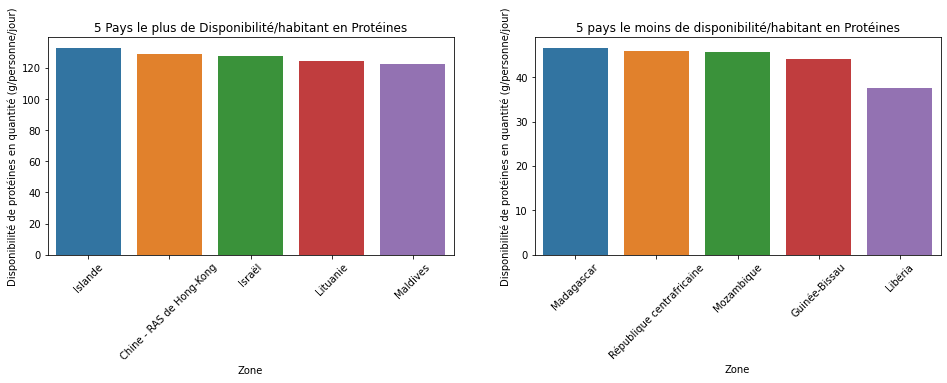

In [69]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x="Zone",y="Disponibilité de protéines en quantité (g/personne/jour)", data=Top5Proteine)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité de protéines en quantité (g/personne/jour)')
plt.title('5 Pays le plus de Disponibilité/habitant en Protéines')

plt.subplot(1,2,2)
sns.barplot(x="Zone",y="Disponibilité de protéines en quantité (g/personne/jour)", data=Tail5Proteine)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité de protéines en quantité (g/personne/jour)')
plt.title('5 pays le moins de disponibilité/habitant en Protéines')

### Réponse 4 Question 7 Selon Disponibilité de matière grasse en quantité (g/personne/jour)
##### le top5 des pays qui sont le plus et le moins de disponibilité par habitant en Matière Grasse

In [70]:
ClassementParMatièreGras=DisponibilitéParHabitant.sort_values(by='Disponibilité de matière grasse en quantité (g/personne/jour)',ascending=False)
ClassementParMatièreGras=ClassementParMatièreGras[['Zone','Disponibilité de matière grasse en quantité (g/personne/jour)']]
print('les top 5 pays ont le plus de disponibilité MatièreGras par habitant')
display(ClassementParMatièreGras.head())
print('les top 5 pays ont le moins de disponibilité MatièreGras habitant')
display(ClassementParMatièreGras.tail())

Top5MG=ClassementParMatièreGras.head(5)
Tail5MG=ClassementParMatièreGras.tail(5)



les top 5 pays ont le plus de disponibilité MatièreGras par habitant


,Zone,Disponibilité de matière grasse en quantité (g/personne/jour)
11,Autriche,170.44
16,Belgique,161.95
171,États-Unis d'Amérique,161.37
53,France,159.15
75,Italie,154.69


les top 5 pays ont le moins de disponibilité MatièreGras habitant


,Zone,Disponibilité de matière grasse en quantité (g/personne/jour)
84,Lesotho,32.26
14,Bangladesh,29.92
172,Éthiopie,25.89
91,Madagascar,24.49
127,Rwanda,23.77


Text(0.5, 1.0, '5 pays le moins de disponibilité/habitant en Matière Grasse')

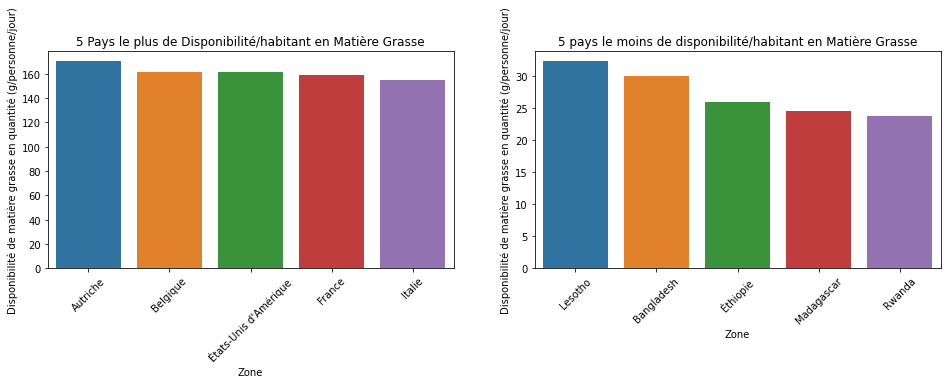

In [71]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x="Zone",y="Disponibilité de matière grasse en quantité (g/personne/jour)", data=Top5MG)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité de matière grasse en quantité (g/personne/jour)')
plt.title('5 Pays le plus de Disponibilité/habitant en Matière Grasse')

plt.subplot(1,2,2)
sns.barplot(x="Zone",y="Disponibilité de matière grasse en quantité (g/personne/jour)", data=Tail5MG)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité de matière grasse en quantité (g/personne/jour)')
plt.title('5 pays le moins de disponibilité/habitant en Matière Grasse')

### Réponse 5 Question 7 Selon Disponibilité alimentaire en quantité (kg/personne/an)
##### le top5 des pays qui sont le plus et le moins de disponibilité par habitant en Alimentaire Quantité

In [72]:
ClassementParQuantitéAlimentaire=DisponibilitéParHabitant.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)',ascending=False)
ClassementParQuantitéAlimentaire=ClassementParQuantitéAlimentaire[['Zone','Disponibilité alimentaire en quantité (kg/personne/an)']]
print('les top 5 pays ont le plus de disponibilité Quantité Alimentaire par habitant')
display(ClassementParQuantitéAlimentaire.head())
print('les top 5 pays ont le moins de disponibilité Quantité Alimentaire par habitant')
display(ClassementParQuantitéAlimentaire.tail())

Top5Qty=ClassementParQuantitéAlimentaire.head(5)
Tail5Qty=ClassementParQuantitéAlimentaire.tail(5)


les top 5 pays ont le plus de disponibilité Quantité Alimentaire par habitant


,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
102,Monténégro,1210.41
89,Luxembourg,1150.66
72,Irlande,1150.15
2,Albanie,1095.54
52,Finlande,1093.77


les top 5 pays ont le moins de disponibilité Quantité Alimentaire par habitant


,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
172,Éthiopie,354.55
0,Afghanistan,351.41
166,Zambie,350.12
167,Zimbabwe,336.59
151,Tchad,319.45


Text(0.5, 1.0, '5 pays le moins de disponibilité/habitant en Quantité')

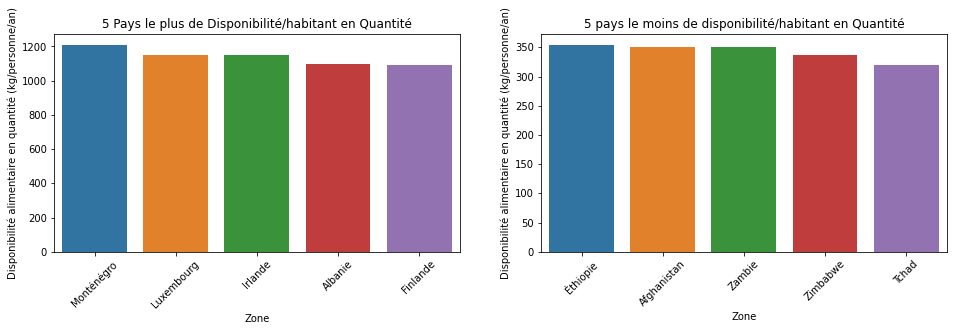

In [73]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x="Zone",y="Disponibilité alimentaire en quantité (kg/personne/an)", data=Top5Qty)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)')
plt.title('5 Pays le plus de Disponibilité/habitant en Quantité')

plt.subplot(1,2,2)
sns.barplot(x="Zone",y="Disponibilité alimentaire en quantité (kg/personne/an)", data=Tail5Qty)
plt.xticks(rotation=45)
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)')
plt.title('5 pays le moins de disponibilité/habitant en Quantité')

## Points Supplémentaires Identifiés:

#### Résultat:

#### df_sous_nutrition2017, les pays ont une population sous nutrition connue:

##### 1. 51 pays ont eu les aides historiques entre 2013 et 2016.

    Nombre des pays >2500Kcal par Habitant Jour: 29 pays
    
    Nombre des pays >3000Kcal par Habitant Jour: 9 pays
    
    Liste des pays >3000Kcal par Habitant Jour: 'Afrique du Sud' 'Albanie' 'Arabie saoudite' 'Argentine'
     'Émirats arabes unis' 'Maroc' 'Mexique' 'Oman' 'Ukraine'
    
    En plus des aides extérieur, on pourra mobiliser les ressources intérieurs pour améliorer la situation.
    

##### 2. 33 pays ont pas eu les aides historiques dont 4 pays sans aide avec une disponibilité Kcal/habitant/jour < 2500Kcal recommandé. Liste de 4 Pays Botswana' 'Eswatini' 'Inde' 'Namibie.

    il faut un suivi particulier sur ces 4 pays et surtout 2 pays suivants: 

    Namibie:
    sa disponibilité Kcal/habitant/j est loin de la seuil recommandé (2166Kcal/habitant/jour)

    Inde :
    Il a 35% de population sous nutrition mondiale, mais avec une disponibilité proche de 2500Kcal/habitant/jour.
    Il est possible qu'il y a une inégalité important dans le pays. En plus des aides extérieurs,
    il est préférable également d'étudier les ressources intérieurs
    
##### 3.  df_sous_nutrition2017, les pays ont une population sous nutrition '0':
    
    Nombre des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition: 13 pays

    Liste des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition: 
        
    'Antigua-et-Barbuda' 'Grenade' 'Guinée-Bissau' 'Îles Salomon' 'Ouganda'
    'République centrafricaine' 'République démocratique populaire lao','Saint-Kitts-et-Nevis' 'Sao Tomé-et-Principe' 'Tadjikistan' 'Yémen'
    'Zambie' 'Zimbabwe'

    On voit 9 pays avec une aide historique, 4 pays sans aide historique.
    
    Il est nécessaire de vérifier les données sous nutrition de ces pays pour voir s'il s'agit une amélioration de la situation en 2017 ou un problème de données.

#### Méthode:
    Lier le tableau df_sous_nutrition2017, df_aideAlimentParPays1, DisponibilitéParHabitant
    
    Vérifier les distributions par Disponibilité Kcal/habitant sur chaque situation
    
    Identifier les valeurs suspectes
    

In [74]:

#Lier le tableau df_sous_nutrition2017 et df_aideAlimentParPays1
SousNutrition_Aide=pd.merge(df_sous_nutrition2017,df_aideAlimentParPays1,how='left',left_on=['Zone'],right_on=['Pays bénéficiaire'])
del SousNutrition_Aide['Pays bénéficiaire']
SousNutrition_Aide=SousNutrition_Aide.fillna(0)

#récuperer seulement les pays avec la population sous nutrition
SousNutrition_Aide=SousNutrition_Aide[SousNutrition_Aide['NombreDePersonne_sous_nutrition']>0]

#Lier le nouveau tableau SousNutrition_Aide avec DisponibilitéParHabitant
SousNutrition_Aide_Dispo=pd.merge(SousNutrition_Aide,DisponibilitéParHabitant,how='left',on=['Zone'])

display(SousNutrition_Aide_Dispo.head())

#On trouve qu'il y a les pays avec Population Sous Nutrition Sans Aide depuis 2013
#On voit également les pays ont reçu l'aide avec la disponibilité Kcal/habitant elevé
#On va voir ces 2 points dans la suite de l'analyse

,Zone,AnnéeCorrigé,NombreDePersonne_sous_nutrition,Aide(tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,2017,10500000,185452.0,2087.0,351.41,33.50,58.26
1,Afrique du Sud,2017,3100000,0.0,3020.0,564.80,83.58,85.33
2,Albanie,2017,100000,0.0,3188.0,1095.54,106.48,111.37
3,Algérie,2017,1300000,81114.0,3293.0,809.13,76.48,91.92
4,Angola,2017,5800000,5014.0,2474.0,701.46,53.54,57.27


In [75]:

#Créer 2 tableaux pour le pays sous nutrition avec et sans aide depuis 2013
#Vérifier le nombre des pays dans les 2 cas

PaysSousNutrition_SansAide=SousNutrition_Aide_Dispo[SousNutrition_Aide_Dispo['Aide(tonnes)']==0]
PaysSousNutrition_AvecAide=SousNutrition_Aide_Dispo[SousNutrition_Aide_Dispo['Aide(tonnes)']!=0]
print('Nombre de pays avec la population sous nutrition sans aide depuis 2013:',SousNutrition_Aide_Dispo[SousNutrition_Aide_Dispo['Aide(tonnes)']==0].Zone.count(),'pays')
print('Nombre de pays avec la population sous nutrition avec aide depuis 2013:',SousNutrition_Aide_Dispo[SousNutrition_Aide_Dispo['Aide(tonnes)']!=0].Zone.count(),'pays')

Nombre de pays avec la population sous nutrition sans aide depuis 2013: 33 pays
Nombre de pays avec la population sous nutrition avec aide depuis 2013: 51 pays


Liste des pays sous nutrition sans aide avec disponibilité Kcal/habitant/j < 2500 ['Botswana' 'Eswatini' 'Inde' 'Namibie']


,Zone,AnnéeCorrigé,NombreDePersonne_sous_nutrition,Aide(tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
10,Botswana,2017,500000,0.0,2325.0,549.63,66.02,64.85
25,Eswatini,2017,200000,0.0,2326.0,509.50,46.72,58.59
34,Inde,2017,190100000,0.0,2454.0,494.93,52.49,59.91
55,Namibie,2017,300000,0.0,2166.0,585.07,49.10,57.61


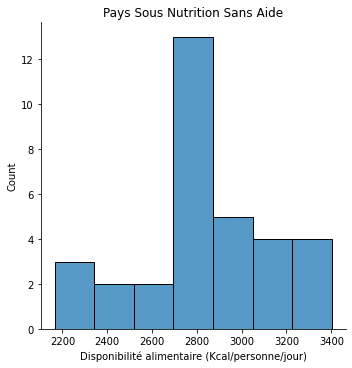

In [76]:
#On vérifie la distribution de la disponibilité Kcal/habitant dans les 2 cas via les graphique
sns.displot(PaysSousNutrition_SansAide, x="Disponibilité alimentaire (Kcal/personne/jour)")
plt.title('Pays Sous Nutrition Sans Aide')
# Dans les pays sans aide, on trouve les pays avec une disponibilité Kcal/habitant < la seuile recommandé 2500Kcal, 
#on les affichier
print('Liste des pays sous nutrition sans aide avec disponibilité Kcal/habitant/j < 2500',PaysSousNutrition_SansAide[PaysSousNutrition_SansAide['Disponibilité alimentaire (Kcal/personne/jour)']<2500].Zone.unique())
display(PaysSousNutrition_SansAide[PaysSousNutrition_SansAide['Disponibilité alimentaire (Kcal/personne/jour)']<2500])


# 4 pays sans aide avec une disponibilité Kcal/habitant/jour < 2500Kcal recommandé.
# il faut un suivi particulier sur ces 4 pays surtout 2 pays: 
#Namibie qui est loins de la seuil recommandé à ce jour (2166Kcal/habitant/jour)

#Inde qui a 35% de population sous nutrition mondiale, mais avec une disponibilité proche de 2500Kcal/habitant/jour,
#il est possible qu'il y a une inégalité important dans le pays, en plus des aides extérieurs, 
#il est préférable également d'étudier les ressources intérieurs


Nombre des pays >2500Kcal par Habitant Jour: 29 pays
Nombre des pays >3000Kcal par Habitant Jour: 9 pays
Liste des pays >3000Kcal par Habitant Jour: ['Afrique du Sud' 'Albanie' 'Arabie saoudite' 'Argentine'
 'Émirats arabes unis' 'Maroc' 'Mexique' 'Oman' 'Ukraine']


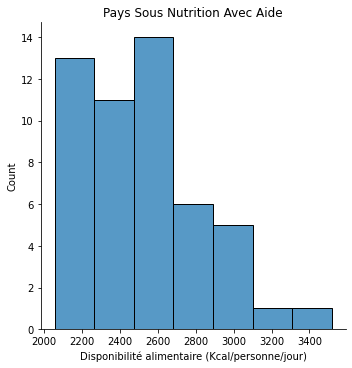

In [77]:
sns.displot(PaysSousNutrition_AvecAide, x="Disponibilité alimentaire (Kcal/personne/jour)")
plt.title('Pays Sous Nutrition Avec Aide')

# Dans les pays avec aide, on trouve les pays avec une disponibilité Kcal/habitant > la seuile recommandé 2500Kcal, 
#on va affichier le nombre des pays qui > 2500Kcal
print('Nombre des pays >2500Kcal par Habitant Jour:',PaysSousNutrition_SansAide[PaysSousNutrition_SansAide['Disponibilité alimentaire (Kcal/personne/jour)']>2500].Zone.count(),'pays')
print('Nombre des pays >3000Kcal par Habitant Jour:',PaysSousNutrition_SansAide[PaysSousNutrition_SansAide['Disponibilité alimentaire (Kcal/personne/jour)']>3000].Zone.count(),'pays')
print('Liste des pays >3000Kcal par Habitant Jour:',PaysSousNutrition_SansAide[PaysSousNutrition_SansAide['Disponibilité alimentaire (Kcal/personne/jour)']>3000].Zone.unique())
# 29 pays > 2500Kcal/habitant/j dont 9 pays > 3000Kcal/habitant/j
#En plus des aides extérieur, on pourra mobiliser les ressources intérieurs pour améliorer la situation.

Nombre des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition: 13
Liste des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition: ['Antigua-et-Barbuda' 'Grenade' 'Guinée-Bissau' 'Îles Salomon' 'Ouganda'
 'République centrafricaine' 'République démocratique populaire lao'
 'Saint-Kitts-et-Nevis' 'Sao Tomé-et-Principe' 'Tadjikistan' 'Yémen'
 'Zambie' 'Zimbabwe']


,Zone,AnnéeCorrigé,NombreDePersonne_sous_nutrition,Aide(tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
2,Antigua-et-Barbuda,2017,0,0.0,2416.0,694.17,89.76,83.49
40,Grenade,2017,0,0.0,2442.0,595.60,86.76,69.20
44,Guinée-Bissau,2017,0,25674.0,2288.0,358.48,63.47,44.05
49,Îles Salomon,2017,0,0.0,2383.0,648.91,46.99,56.31
74,Ouganda,2017,0,64622.0,2126.0,535.58,46.57,52.64
85,République centrafricaine,2017,0,66610.0,1879.0,453.73,59.41,46.04
89,République démocratique populaire lao,2017,0,28000.0,2455.0,632.20,38.86,68.89
93,Saint-Kitts-et-Nevis,2017,0,0.0,2491.0,555.86,88.90,72.32
97,Sao Tomé-et-Principe,2017,0,1826.0,2398.0,663.93,77.67,53.10
106,Tadjikistan,2017,0,2028.0,2199.0,520.41,60.38,63.38


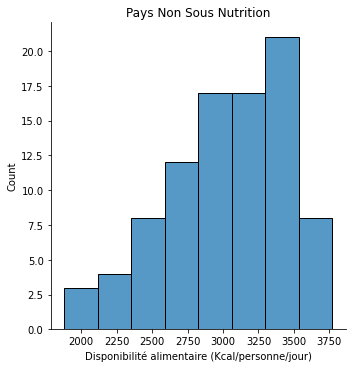

In [78]:
#Lier le tableau df_sous_nutrition2017 et df_aideAlimentParPays1
PaysNonSousNutrition=pd.merge(df_sous_nutrition2017,df_aideAlimentParPays1,how='left',left_on=['Zone'],right_on=['Pays bénéficiaire'])
del PaysNonSousNutrition['Pays bénéficiaire']
PaysNonSousNutrition=PaysNonSousNutrition.fillna(0)

#  Créer tableau PaysNonSousNutrition pour Pays déclare 0 population sous nutrition dans df_sous_nutrition2017
PaysNonSousNutrition=PaysNonSousNutrition[PaysNonSousNutrition['NombreDePersonne_sous_nutrition']==0]

#Lier PaysNonSousNutrition et DisponibilitéParHabitant
PaysNonSousNutrition_Dispo=pd.merge(PaysNonSousNutrition,DisponibilitéParHabitant,how='left',on=['Zone'])

#Vérifier la distribution de disponibilité Kcal/habitant
sns.displot(PaysNonSousNutrition_Dispo, x="Disponibilité alimentaire (Kcal/personne/jour)")
plt.title('Pays Non Sous Nutrition')

#On trouve 13 pays avec une disponibilité Kcal/habitant/j < 2500, mais sans population sous nutrition
#Affichier ces 13 pays
print('Nombre des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition:',PaysNonSousNutrition_Dispo[PaysNonSousNutrition_Dispo['Disponibilité alimentaire (Kcal/personne/jour)']<2500].Zone.count())
print('Liste des Pays qui a une disponibilité/habitant/jour en Kcal <2500 mais sans population sous nutrition:',PaysNonSousNutrition_Dispo[PaysNonSousNutrition_Dispo['Disponibilité alimentaire (Kcal/personne/jour)']<2500].Zone.unique())
display(PaysNonSousNutrition_Dispo[PaysNonSousNutrition_Dispo['Disponibilité alimentaire (Kcal/personne/jour)']<2500])

# On voit 9 pays avec une aide historique, 4 pays sans aide historique.
# Il est nécessaire de vérifier les données sous nutrition de ces pays pour voir s'il s'agit une amélioration de la situation en 2017 ou un erreur de la collection des données.



## Analyse de la Situation de Manioc en Thaïlande

##### Situation: 

1 En 2017, Thaïlande a 6.2 Millons de population sous nutrition sur une population totale de 69.21 Millions
soit un taux de sous nutrition dans le pays : 8.96%

2 En 2017,Thaïlande a produit : 30228.0 mille tonnes de Manioc, mais 25214.0 mille tonnes de Manioc exportées
Soit un taux de Exportation de Manioc en Thaïlande: 83.41 %
Si on tien compte Quantité importé ,la quantité NET de Manioc exporté en Thaïland est: 23964.0 mille tonnes de Manioc exportées.Soit un taux de Exportation de Manioc en Thaïlande: 79.28 %

En 2017,Thaïlande a réparti : 871.0 mille tonnes de Manioc pour nourriture, dans 6264.0 mille tonnes de Disponibilité Intérieur de Manioc,soit un taux de repartition Nourriture de: 13.9 %.

3 La disponibilité Calorie/habitant de Thaïlande est 2785Kcal/personne/jour qui est largement supérieur à la seuil 2500Kcal recommandé.

##### Conclusion: 

Thaïlande est le leader mondial de producteur de Manioc.La porportation important de l'exportation par rapport à la production de Manioc en Thaïlande est liés à la politique de gouvernement local. La répartition de la disponibilité intérieur de Manioc montre également la faible attribuation à la nourriture humain.La disponibilité calorie/habitant 2785Kcal par rapport au taux de sous nutrition dans le pays montre également l'inégalité de la distribution des ressources en Thaïlande.

Le gouvernement local pourra diminuer l'exportation de Manioc pour aider sa population sous nutrition. Ou il pourra également optimiser la distribution de revenue liés à l'exportation de Manioc en tenant compte le besoin de sa population sous nutrition.

Mais dans tous les cas, il est favorable que le gouvernement local pourra diminuer l'inégalité intérieur liés à la disponibilité alimentaire pour améliorer durablement la situation de sous nutrition.


In [79]:
# Situation de sous nutrition en Thaïlande

SousNutritionThai2017=df_sous_nutrition[(df_sous_nutrition.Zone=='Thaïlande')&(df_sous_nutrition['AnnéeCorrigé']==2017)]
PopulationThai2017=df_population[(df_population.Zone=='Thaïlande')&(df_population['Année']==2017)]
print('SousNutritionThai2017:\n')
display(SousNutritionThai2017)
print('PopulationThai2017:\n')
display(PopulationThai2017)
print('Taux de Sous Nutrition Thaïlande:\n',round((SousNutritionThai2017['NombreDePersonne_sous_nutrition'].sum()/PopulationThai2017.Population.sum())*100,2),'%')

SousNutritionThai2017:



,Zone,Année,Valeur,AnnéeCorrigé,NombreDePersonne_sous_nutrition
1114,Thaïlande,2016-2018,6.2,2017,6200000


PopulationThai2017:



,Zone,Année,Valeur,Population
1312,Thaïlande,2017,69209.81,69209810.0


Taux de Sous Nutrition Thaïlande:
 8.96 %


In [80]:
# Vérifier la situation de Manioc en Thaïlande
ManiocThai=df_dispo_alimentaire[(df_dispo_alimentaire.Produit=='Manioc')&(df_dispo_alimentaire.Zone=='Thaïlande')]
display(ManiocThai)

#DisponibilitéIntérieur=Production+Importation+Variation de stock-Exportation

#Calculer le ratio Export/Production
RatioManiocExportThai=ManiocThai['Exportations - Quantité'].sum()/ManiocThai.Production.sum()

#Calculer le ratio (Export - import)/Production
RatioManiocExportThaiNet=(ManiocThai['Exportations - Quantité'].sum()-ManiocThai['Importations - Quantité'].sum())/ManiocThai.Production.sum()

#Calculer le ratio Nourriture Humain/Disponibilité Intérieur
RatioManiocNourriture=ManiocThai['Nourriture'].sum()/ManiocThai['Disponibilité intérieure'].sum()

print('En 2017,Thaïlande a produit :',ManiocThai.Production.sum(),'mille tonnes de Manioc, mais', ManiocThai['Exportations - Quantité'].sum(),'mille tonnes de Manioc exportées')
print('Soit un taux de Exportation de Manioc en Thaïlande:',round((RatioManiocExportThai*100),2),'%')
print('**********************************************************************')
print('Si on tien compte Quantité importé ,la quantité net de Manioc exporté en Thaïland est:', ManiocThai['Exportations - Quantité'].sum()- ManiocThai['Importations - Quantité'].sum(),'mille tonnes de Manioc exportées')
print('Soit un taux de Exportation de Manioc en Thaïlande:',round((RatioManiocExportThaiNet*100),2),'%')

print('**********************************************************************')
print('En 2017,Thaïlande a réparti :',ManiocThai['Nourriture'].sum(),'mille tonnes de Manioc pour nourriture, dans', ManiocThai['Disponibilité intérieure'].sum(),'mille tonnes de Disponibilité Intérieur de Manioc')
print('Soit un taux de repartition Nourriture de:',round((RatioManiocNourriture*100),2),'%')


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2017,69209810.0


En 2017,Thaïlande a produit : 30228.0 mille tonnes de Manioc, mais 25214.0 mille tonnes de Manioc exportées
Soit un taux de Exportation de Manioc en Thaïlande: 83.41 %
**********************************************************************
Si on tien compte Quantité importé ,la quantité net de Manioc exporté en Thaïland est: 23964.0 mille tonnes de Manioc exportées
Soit un taux de Exportation de Manioc en Thaïlande: 79.28 %
**********************************************************************
En 2017,Thaïlande a réparti : 871.0 mille tonnes de Manioc pour nourriture, dans 6264.0 mille tonnes de Disponibilité Intérieur de Manioc
Soit un taux de repartition Nourriture de: 13.9 %


In [81]:
# On vérifie également Disponibilité Kcal/habitant en Thaïlande
#Filtrer Thaïlande dans la colonne Zone de dataframe df_dispo_alimentaire et remplir les cases vides par '0'
DisponibiliteThai=df_dispo_alimentaire[df_dispo_alimentaire.Zone=='Thaïlande']
DisponibiliteThai['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0)
#Calculer la sum de disponibilité Kcal/habitant/jour
DisponibiliteKcalParHabitantThai=DisponibiliteThai['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
print('Après la quantité exportée de Manioc,La disponibilité calorie par Habitant en Thaïlande est:\n',DisponibiliteKcalParHabitantThai,'Kcal/personne/jour')

Après la quantité exportée de Manioc,La disponibilité calorie par Habitant en Thaïlande est:
 2785.0 Kcal/personne/jour


Text(-7.375, 0.5, 'Mille Tonnes')

<Figure size 1152x576 with 0 Axes>

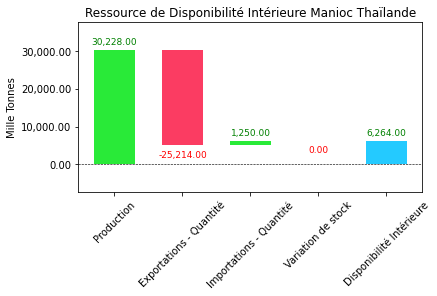

In [82]:
#Graphieque type Water Fall pour visualiser le proportion de chaque variable dans la disponibilité intérieur de Manioc en Thaïlande
#DisponibilitéIntérieur=Production+Importation+Variation de stock-Exportation
plt.figure(figsize=(16,8)) 
x = [30228,-25214,1250, 0] 
label = ["Production","Exportations - Quantité","Importations - Quantité","Variation de stock"]
waterfall_chart.plot(label, x, net_label='Disponibilité Intérieure',rotation_value=45,formatting='{:,.2f}')
plt.title("Ressource de Disponibilité Intérieure Manioc Thaïlande")
plt.ylabel("Mille Tonnes")

Text(-1.0, 0.5, 'Mille Tonnes')

<Figure size 1152x576 with 0 Axes>

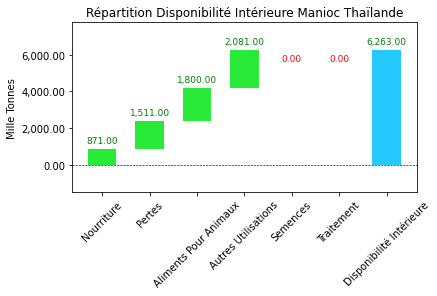

In [83]:
#Graphieque type Water Fall pour visualiser le proportion de chaque variable dans la disponibilité intérieur de Manioc en Thaïlande
#DisponibilitéIntérieur=Production+Importation+Variation de stock-Exportation
plt.figure(figsize=(16,8)) 
x = [871, 1511, 1800, 2081, 0, 0] 
label = ["Nourriture","Pertes","Aliments Pour Animaux","Autres Utilisations","Semences","Traitement"]
waterfall_chart.plot(label, x, net_label='Disponibilité Intérieure',rotation_value=45,formatting='{:,.2f}')
plt.title("Répartition Disponibilité Intérieure Manioc Thaïlande")
plt.ylabel("Mille Tonnes")